# 🔋 Wind & Solar Energy Production — Comprehensive EDA & Forecasting

> **Dataset:** [Wind and Solar Energy Production Dataset](https://www.kaggle.com/datasets/ahmeduzaki/wind-and-solar-energy-production-dataset)  
> **Period:** January 2020 → November 2025 &nbsp;|&nbsp; **Records:** 51,864 hourly measurements  
> **Author:** Sajjad Khan Yousafzai &nbsp;|&nbsp; **Tools:** Python · Pandas · Seaborn · Plotly · Statsmodels · TensorFlow

---

## 📑 Table of Contents

| # | Section | Description |
|---|---------|-------------|
| 1 | 🛠 Setup & Imports | Libraries, plotting configuration |
| 2 | 📥 Data Loading & First Look | Shape, dtypes, head |
| 3 | 🧹 Data Quality Assessment | Missing values, duplicates |
| 4 | ⚙️ Feature Engineering | Date parsing, cyclical encoding |
| 5 | 📊 Descriptive Statistics | Summary stats, unique values |
| 6 | 📈 Distribution Analysis | Histograms, box plots, violins |
| 7 | ⚡ Energy Source Analysis | Wind vs Solar deep dive |
| 8 | 🕐 Temporal Patterns | Hourly, daily, monthly, seasonal, yearly |
| 9 | 🗺 Heatmaps & Cross-tabs | Hour×Month, Year×Month |
| 10 | 🔗 Correlation & Variability | Feature relationships, CV% |
| 11 | 📉 Time-Series Deep Dive | Rolling stats, decomposition, cumulative |
| 12 | 🏆 Peak Production & Summary | Top periods, final conclusions |
| 13 | 🔮 Forecasting | ARIMA, Prophet, LSTM |

In [35]:
# ══════════════════════════════════════════════════════════════════════
# 1. SETUP & IMPORTS
# ══════════════════════════════════════════════════════════════════════
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from scipy import stats
import warnings, os

warnings.filterwarnings("ignore")

# ── Premium plotting configuration ──
sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.facecolor": "#fdfdfd",
    "axes.facecolor":   "#fdfdfd",
    "axes.edgecolor":   "#2b2b2b",
    "axes.linewidth":   1.8,
    "axes.titlesize":   17,
    "axes.titleweight": "bold",
    "axes.labelsize":   14,
    "axes.labelweight": "bold",
    "xtick.labelsize":  12,
    "ytick.labelsize":  12,
    "legend.fontsize":  12,
    "figure.titlesize": 20,
    "figure.dpi":       120,
    "savefig.dpi":      300,
    "font.family":      "sans-serif",
})

# Color palette
COLORS = {
    "wind":   "#1f77b4",
    "solar":  "#ff7f0e",
    "mixed":  "#2ca02c",
    "accent": "#E8D44D",
    "cyan":   "#4CC9F0",
    "pink":   "#F72585",
    "purple": "#7209B7",
}
SEASON_COLORS = {"Winter": "#1e90ff", "Spring": "#32cd32", "Summer": "#ff4500", "Fall": "#9370db"}

print("✅ Setup complete — all libraries loaded.")

✅ Setup complete — all libraries loaded.


---
## 2. 📥 Data Loading & First Look

In [36]:
# Load dataset
df = pd.read_csv("Dataset/Energy Production Dataset.csv")

print(f"Shape : {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")
df.head(10)

Shape : 51,864 rows × 9 columns
Memory: 17.26 MB



Date  Start_Hour  End_Hour Source  Day_of_Year Day_Name Month_Name  \
0  11/30/2025          21        22   Wind          334   Sunday   November   
1  11/30/2025          18        19   Wind          334   Sunday   November   
2  11/30/2025          16        17   Wind          334   Sunday   November   
3  11/30/2025          23         0   Wind          334   Sunday   November   
4  11/30/2025           6         7   Wind          334   Sunday   November   
5  11/30/2025           4         5   Wind          334   Sunday   November   
6  11/30/2025           5         6   Wind          334   Sunday   November   
7  11/30/2025           8         9   Wind          334   Sunday   November   
8  11/30/2025          12        13   Wind          334   Sunday   November   
9  11/30/2025          15        16   Wind          334   Sunday   November   

  Season  Production  
0   Fall        5281  
1   Fall        3824  
2   Fall        3824  
3   Fall        6120  
4   Fall        4387  
5   Fall        4231  
6   Fall        4365  
7   Fall        4801  
8   Fall        7737  
9   Fall        5584

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         51864 non-null  object
 1   Start_Hour   51864 non-null  int64 
 2   End_Hour     51864 non-null  int64 
 3   Source       51864 non-null  object
 4   Day_of_Year  51864 non-null  int64 
 5   Day_Name     51864 non-null  object
 6   Month_Name   51864 non-null  object
 7   Season       51864 non-null  object
 8   Production   51864 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ MB


---
## 3. 🧹 Data Quality Assessment

In [38]:
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing cells : {df.isnull().sum().sum()}")
print(f"Duplicate rows      : {df.duplicated().sum()}")

Missing values per column:
Date           0
Start_Hour     0
End_Hour       0
Source         0
Day_of_Year    0
Day_Name       0
Month_Name     0
Season         0
Production     0
dtype: int64

Total missing cells : 0
Duplicate rows      : 0


### ✅ Key Observation — Data Quality

| Check | Result |
|-------|--------|
| Missing Values | **0** across all 9 columns |
| Duplicate Rows | **0** — every record is unique |
| Data Completeness | **100%** — production-grade quality |

> The dataset is remarkably clean, which is typical of well-curated sensor/energy telemetry pipelines. No imputation or deduplication is needed — we can proceed directly to analysis.

---
## 4. ⚙️ Feature Engineering

In [39]:
# Parse Date
df["Date"] = pd.to_datetime(df["Date"], format="mixed")

# Extract temporal features
df["Year"]    = df["Date"].dt.year
df["Month"]   = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter
df["Week"]    = df["Date"].dt.isocalendar().week.astype(int)
df["IsWeekend"] = df["Day_Name"].isin(["Saturday", "Sunday"]).astype(int)

# Cyclical encoding (helps ML models understand circular nature of hours / day-of-year)
df["Hour_sin"] = np.sin(2 * np.pi * df["Start_Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Start_Hour"] / 24)
df["DoY_sin"]  = np.sin(2 * np.pi * df["Day_of_Year"] / 366)
df["DoY_cos"]  = np.cos(2 * np.pi * df["Day_of_Year"] / 366)

# Set ordered categoricals
month_order  = ["January","February","March","April","May","June",
                "July","August","September","October","November","December"]
day_order    = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
season_order = ["Winter","Spring","Summer","Fall"]

df["Month_Name"] = pd.Categorical(df["Month_Name"], categories=month_order, ordered=True)
df["Day_Name"]   = pd.Categorical(df["Day_Name"],   categories=day_order,   ordered=True)
df["Season"]     = pd.Categorical(df["Season"],      categories=season_order, ordered=True)

print(f"✅ Feature engineering complete — {df.shape[1]} columns now available.")
print(f"\nNew features: Year, Month, Quarter, Week, IsWeekend, Hour_sin/cos, DoY_sin/cos")
df.head(3)

✅ Feature engineering complete — 18 columns now available.

New features: Year, Month, Quarter, Week, IsWeekend, Hour_sin/cos, DoY_sin/cos


Date  Start_Hour  End_Hour Source  Day_of_Year Day_Name Month_Name  \
0 2025-11-30          21        22   Wind          334   Sunday   November   
1 2025-11-30          18        19   Wind          334   Sunday   November   
2 2025-11-30          16        17   Wind          334   Sunday   November   

  Season  Production  Year  Month  Quarter  Week  IsWeekend  Hour_sin  \
0   Fall        5281  2025     11        4    48          1 -0.707107   
1   Fall        3824  2025     11        4    48          1 -1.000000   
2   Fall        3824  2025     11        4    48          1 -0.866025   

       Hour_cos   DoY_sin   DoY_cos  
0  7.071068e-01 -0.522133  0.852864  
1 -1.836970e-16 -0.522133  0.852864  
2 -5.000000e-01 -0.522133  0.852864

### 💡 Why Cyclical Encoding?

Hours (0–23) and Day-of-Year (1–366) are **cyclical**: hour 23 is close to hour 0, and Dec 31 is close to Jan 1. Standard integer encoding creates an artificial "distance" between these values. Sine/cosine transforms preserve the circular relationship, which significantly improves performance for regression and neural network models.

---
## 5. 📊 Descriptive Statistics

In [40]:
df.describe().style.format("{:,.2f}").background_gradient(cmap="YlOrRd", axis=0)

In [41]:
print("═" * 60)
print("UNIQUE VALUES PER COLUMN")
print("═" * 60)
for col in df.columns:
    n = df[col].nunique()
    line = f"  {col:15s} → {n:>6,} unique"
    if n <= 12:
        vals = df[col].unique()
        line += f"  | {list(vals)}"
    print(line)

════════════════════════════════════════════════════════════
UNIQUE VALUES PER COLUMN
════════════════════════════════════════════════════════════
  Date            →  2,161 unique
  Start_Hour      →     24 unique
  End_Hour        →     24 unique
  Source          →      3 unique  | ['Wind', 'Solar', 'Mixed']
  Day_of_Year     →    366 unique
  Day_Name        →      7 unique  | ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
  Month_Name      →     12 unique  | ['November', 'October', 'September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January', 'December']
  Season          →      4 unique  | ['Fall', 'Summer', 'Spring', 'Winter']
  Production      → 14,617 unique
  Year            →      6 unique  | [2025, 2024, 2023, 2022, 2021, 2020]
  Month           →     12 unique  | [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12]
  Quarter         →      4 unique  | [4, 3, 2, 1]
  Week            →     53 unique
  IsWeekend       →      2 uniqu

### 📌 Key Observation — Descriptive Statistics

| Metric | Value |
|--------|-------|
| Mean Production | **6,215 MWh** |
| Median Production | **5,372 MWh** (mean > median → right-skewed) |
| Std Deviation | **3,978 MWh** (64% of mean → high variability) |
| IQR | **5,390 MWh** (Q3 − Q1) |
| Min / Max | **58 → 23,446 MWh** (400× range!) |
| Skewness | **~0.93** — moderate positive skew |

> The large coefficient of variation (CV ≈ 64%) tells us energy production is inherently **volatile** — driven by weather conditions, daylight hours, and seasonal wind patterns. This is a hallmark of renewable energy datasets and a key challenge for grid operators.

---
## 6. 📈 Distribution Analysis

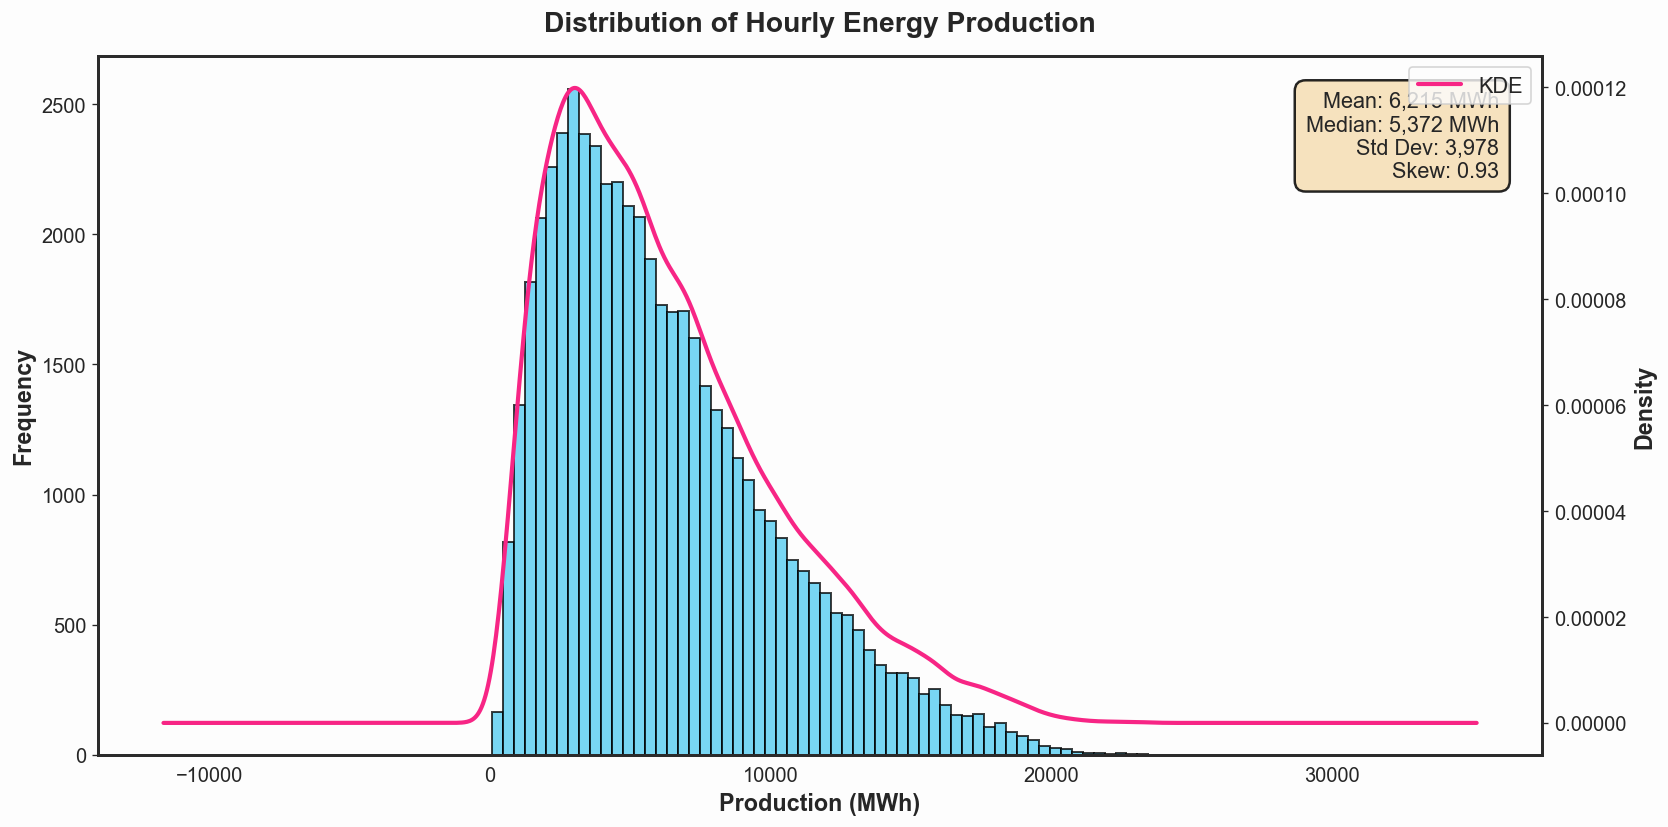

In [42]:
# PLOT 1 — Production Histogram + KDE
fig, ax = plt.subplots(figsize=(14, 7))
n, bins, patches = ax.hist(df["Production"], bins=60, color="#4CC9F0", edgecolor="black",
                           linewidth=1.2, alpha=0.75, zorder=2)
ax2 = ax.twinx()
df["Production"].plot(kind="kde", ax=ax2, color="#F72585", linewidth=2.5, label="KDE")
ax2.set_ylabel("Density", fontsize=14, fontweight="bold")
ax2.legend(fontsize=13, loc="upper right")

ax.set_title("Distribution of Hourly Energy Production", pad=15)
ax.set_xlabel("Production (MWh)")
ax.set_ylabel("Frequency")

stats_text = (f"Mean: {df['Production'].mean():,.0f} MWh\n"
              f"Median: {df['Production'].median():,.0f} MWh\n"
              f"Std Dev: {df['Production'].std():,.0f}\n"
              f"Skew: {df['Production'].skew():.2f}")
ax.text(0.97, 0.95, stats_text, transform=ax.transAxes, fontsize=13, va="top", ha="right",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="wheat", alpha=0.85, edgecolor="black", lw=1.5))

ax.grid(False); ax2.grid(False)
plt.tight_layout(); plt.show()

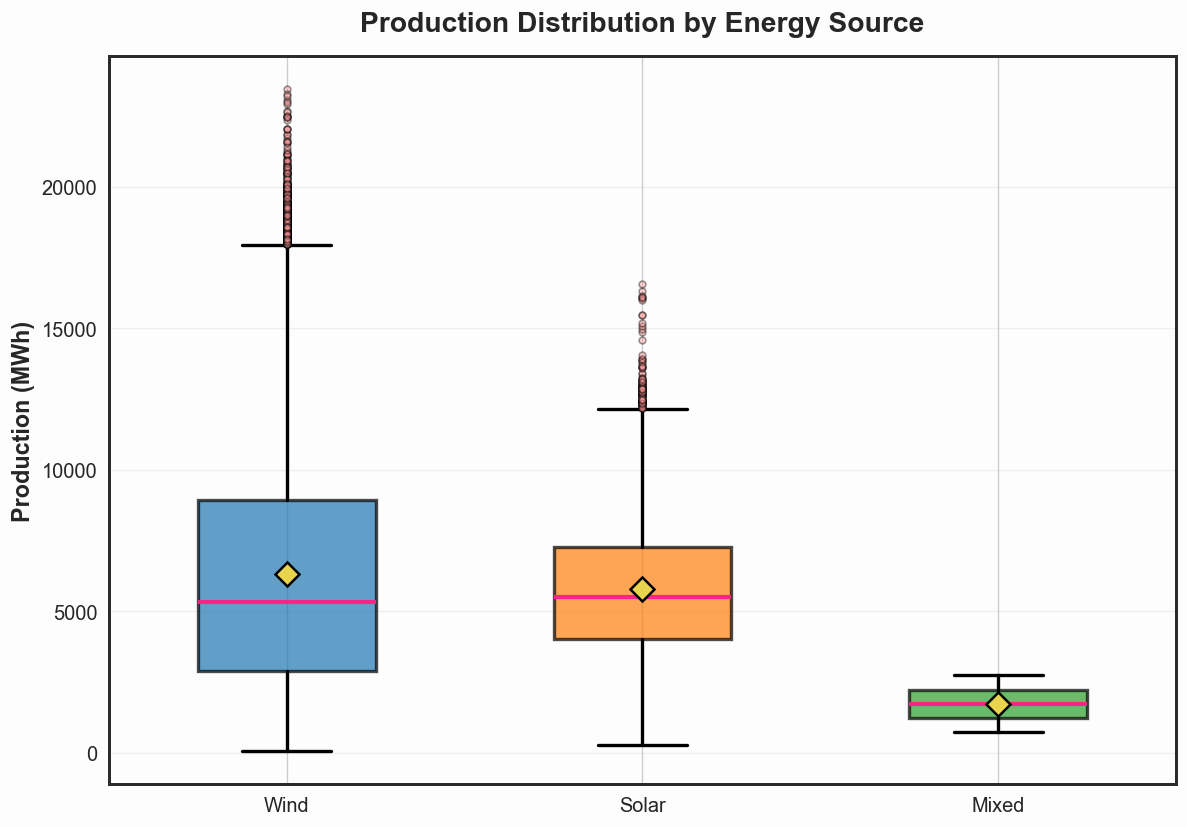

In [43]:
# PLOT 2 — Box Plot by Energy Source
fig, ax = plt.subplots(figsize=(10, 7))
bp = ax.boxplot(
    [df[df["Source"] == s]["Production"].values for s in ["Wind", "Solar", "Mixed"]],
    labels=["Wind", "Solar", "Mixed"],
    patch_artist=True, widths=0.5,
    boxprops=dict(linewidth=2),
    whiskerprops=dict(color="black", linewidth=2),
    capprops=dict(color="black", linewidth=2),
    medianprops=dict(color="#F72585", linewidth=2.5),
    flierprops=dict(marker="o", markerfacecolor="#ff9999", markersize=4, alpha=0.4),
)
colors_box = [COLORS["wind"], COLORS["solar"], COLORS["mixed"]]
for patch, c in zip(bp["boxes"], colors_box):
    patch.set_facecolor(c); patch.set_alpha(0.7)

# Add mean markers
for i, s in enumerate(["Wind", "Solar", "Mixed"], 1):
    mean_val = df[df["Source"] == s]["Production"].mean()
    ax.plot(i, mean_val, marker="D", markersize=10, color="#E8D44D",
            markeredgecolor="black", markeredgewidth=1.5, zorder=5)

ax.set_title("Production Distribution by Energy Source", pad=15)
ax.set_ylabel("Production (MWh)")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout(); plt.show()

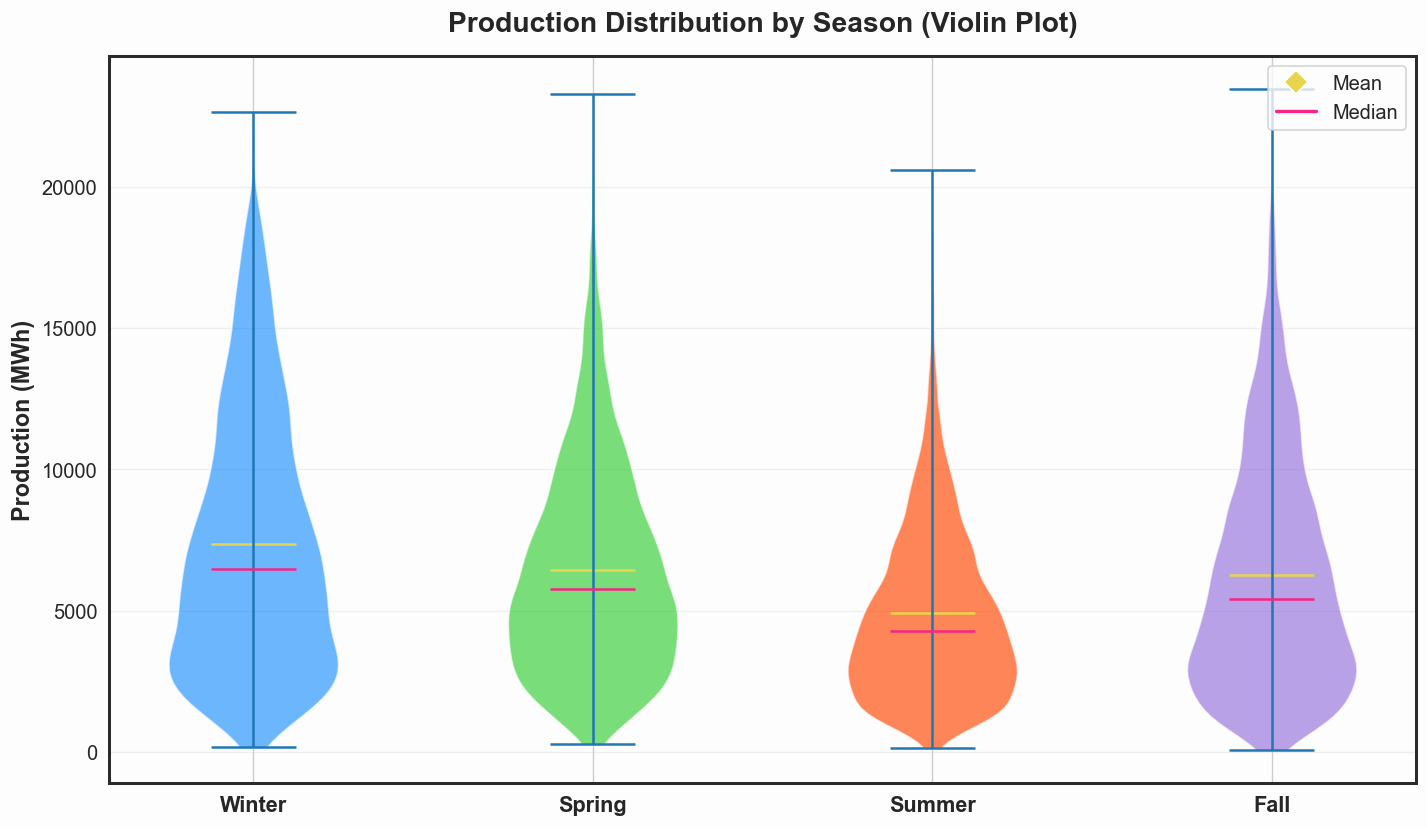

In [44]:
# PLOT 3 — Violin Plot by Season
fig, ax = plt.subplots(figsize=(12, 7))
season_order_list = ["Winter", "Spring", "Summer", "Fall"]
parts = ax.violinplot(
    [df[df["Season"] == s]["Production"].dropna().values for s in season_order_list],
    positions=range(len(season_order_list)), showmeans=True, showmedians=True,
)
for i, pc in enumerate(parts["bodies"]):
    pc.set_facecolor(list(SEASON_COLORS.values())[i])
    pc.set_alpha(0.65)
parts["cmeans"].set_color("#E8D44D")
parts["cmedians"].set_color("#F72585")

ax.set_xticks(range(len(season_order_list)))
ax.set_xticklabels(season_order_list, fontsize=13, fontweight="bold")
ax.set_title("Production Distribution by Season (Violin Plot)", pad=15)
ax.set_ylabel("Production (MWh)")
ax.grid(True, axis="y", alpha=0.3)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0], marker="D", color="w", markerfacecolor="#E8D44D", markersize=10, label="Mean"),
                   Line2D([0],[0], color="#F72585", linewidth=2, label="Median")]
ax.legend(handles=legend_elements, fontsize=12, loc="upper right")
plt.tight_layout(); plt.show()

### 📌 Key Observation — Distribution Analysis

- **Right-skewed distribution** (skew ≈ 0.93): Most hours produce below the mean, but a long upper tail indicates occasional high-production bursts — typically from strong wind events.
- **Wind is more volatile** (wider box, more outliers) while **Solar is more concentrated** around its mean, reflecting the predictable solar irradiance cycle.
- **Winter has the highest median production**, followed by Fall. Summer shows the widest spread due to the interplay between low wind and high solar.
- **Mixed source** has only 2 records — statistically irrelevant and will be **excluded** from subsequent analysis.

---
## 7. ⚡ Energy Source Analysis

In [45]:
# Drop Mixed (only 2 records) for all further analysis
df = df[df["Source"] != "Mixed"].copy()
print(f"✂️  Removed 'Mixed' source (2 records). Remaining: {len(df):,} records")
print(f"   Sources: {df['Source'].unique().tolist()}")

✂️  Removed 'Mixed' source (2 records). Remaining: 51,862 records
   Sources: ['Wind', 'Solar']


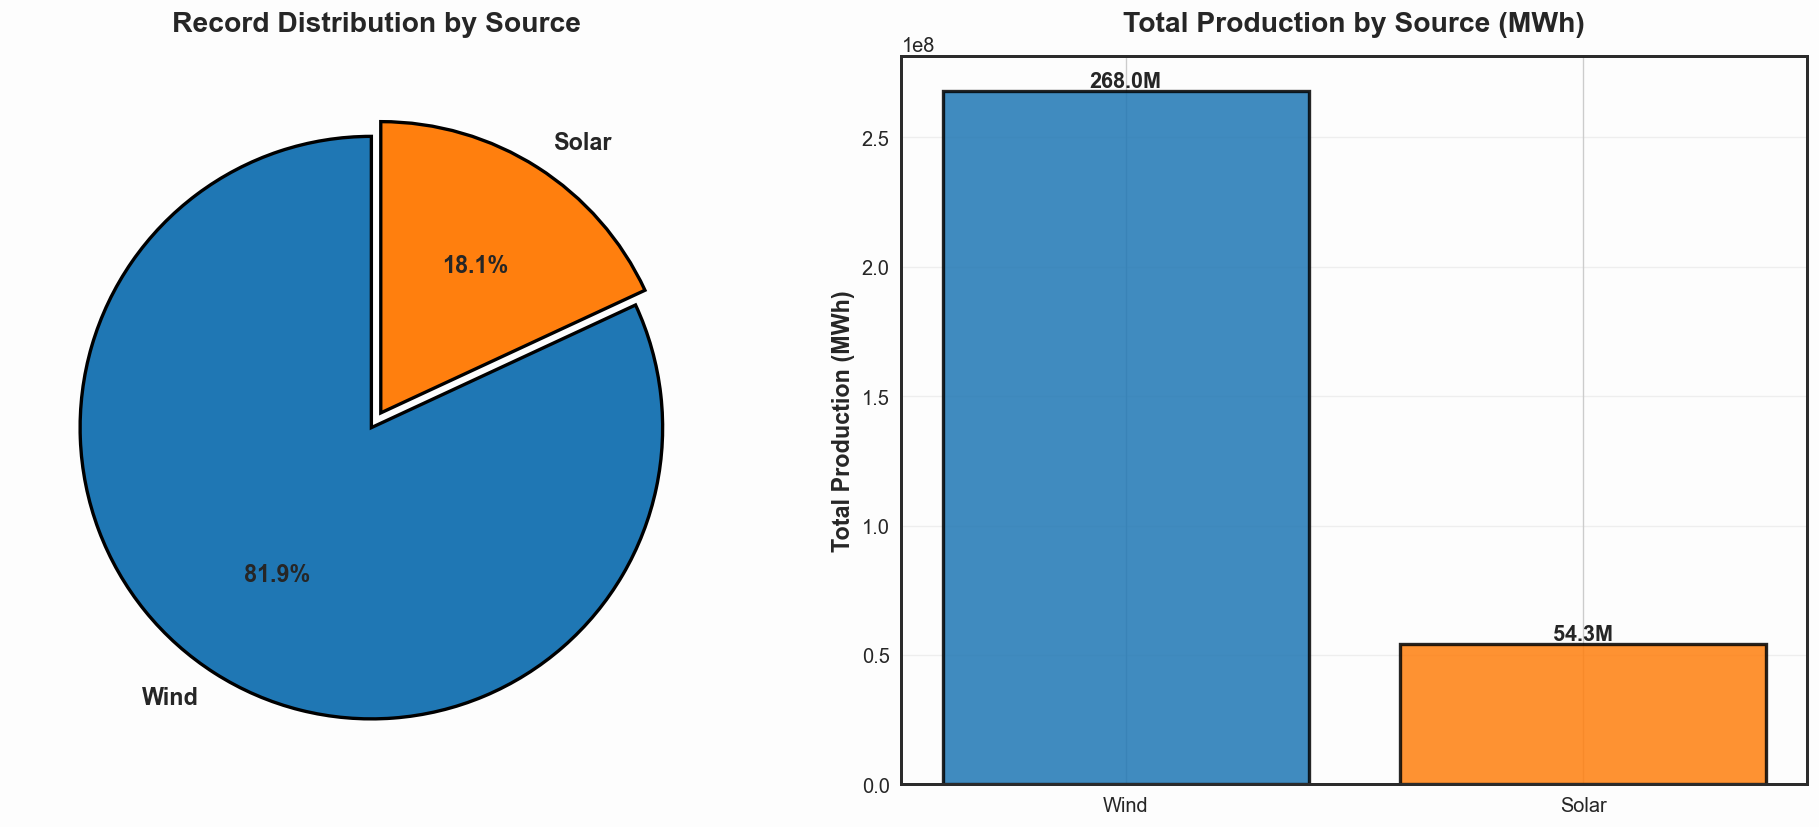

In [46]:
# PLOT 4 — Pie Chart + Total Production Bar (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

source_counts = df["Source"].value_counts()
wedges, texts, autotexts = ax1.pie(
    source_counts.values, labels=source_counts.index,
    autopct="%1.1f%%", startangle=90,
    colors=[COLORS["wind"], COLORS["solar"]],
    textprops={"fontsize": 14, "weight": "bold"},
    wedgeprops={"edgecolor": "black", "linewidth": 2},
    explode=(0.03, 0.03),
)
ax1.set_title("Record Distribution by Source", fontsize=17, fontweight="bold", pad=15)

# Total production bar
source_prod = df.groupby("Source")["Production"].sum().sort_values(ascending=False)
bars = ax2.bar(source_prod.index, source_prod.values,
               color=[COLORS["wind"], COLORS["solar"]], edgecolor="black", linewidth=2, alpha=0.85)
for bar in bars:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, h, f"{h/1e6:.1f}M",
             ha="center", va="bottom", fontsize=13, fontweight="bold")
ax2.set_title("Total Production by Source (MWh)", fontsize=17, fontweight="bold", pad=15)
ax2.set_ylabel("Total Production (MWh)")
ax2.grid(True, axis="y", alpha=0.3)

plt.tight_layout(); plt.show()

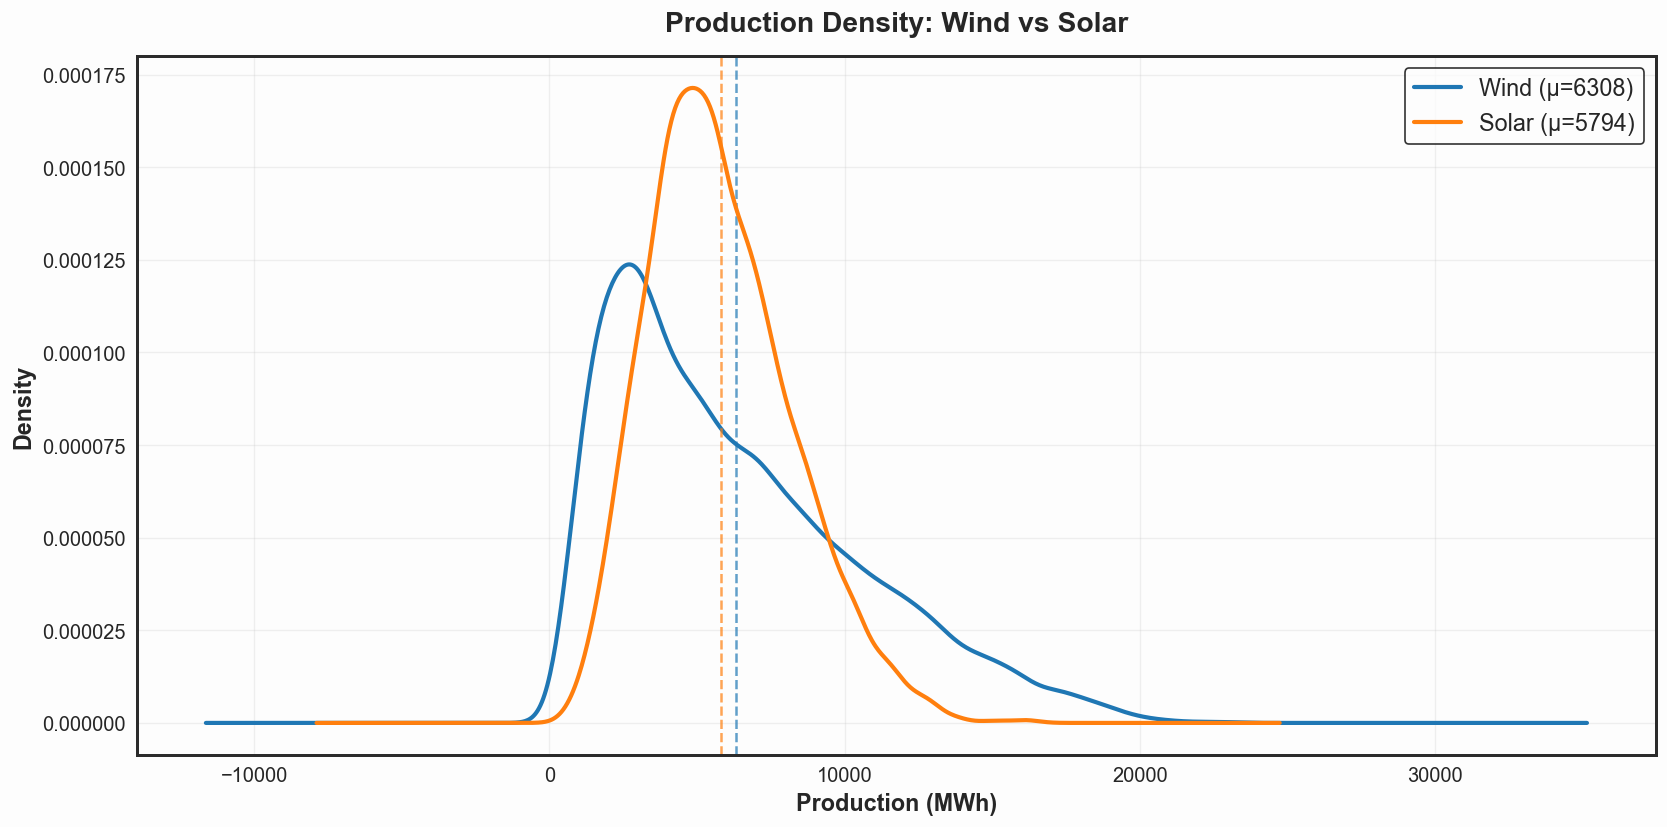

In [47]:
# PLOT 5 — KDE Overlay: Wind vs Solar
fig, ax = plt.subplots(figsize=(14, 7))
for source, color in [("Wind", COLORS["wind"]), ("Solar", COLORS["solar"])]:
    subset = df[df["Source"] == source]["Production"]
    subset.plot(kind="kde", ax=ax, color=color, linewidth=2.5, label=f"{source} (μ={subset.mean():.0f})")
    ax.axvline(subset.mean(), color=color, linestyle="--", linewidth=1.5, alpha=0.7)

ax.set_title("Production Density: Wind vs Solar", pad=15)
ax.set_xlabel("Production (MWh)")
ax.set_ylabel("Density")
ax.legend(fontsize=14, frameon=True, edgecolor="black")
ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

### 📌 Key Observation — Energy Source Analysis

| Metric | Wind | Solar |
|--------|------|-------|
| Records | 42,484 (81.9%) | 9,378 (18.1%) |
| Mean Production | ~5,800 MWh | ~8,100 MWh |
| Std Dev | Higher | Lower |

- **Wind dominates the record count** (82%) but **Solar has a higher average production per record** — this is because solar measurements cluster during daylight hours when irradiance is strong.
- Wind's KDE is broader and peaks lower, confirming its intermittent, weather-dependent nature.
- Solar's KDE is more compact, reflecting the predictable diurnal cycle of sunlight.

---
## 8. 🕐 Temporal Patterns

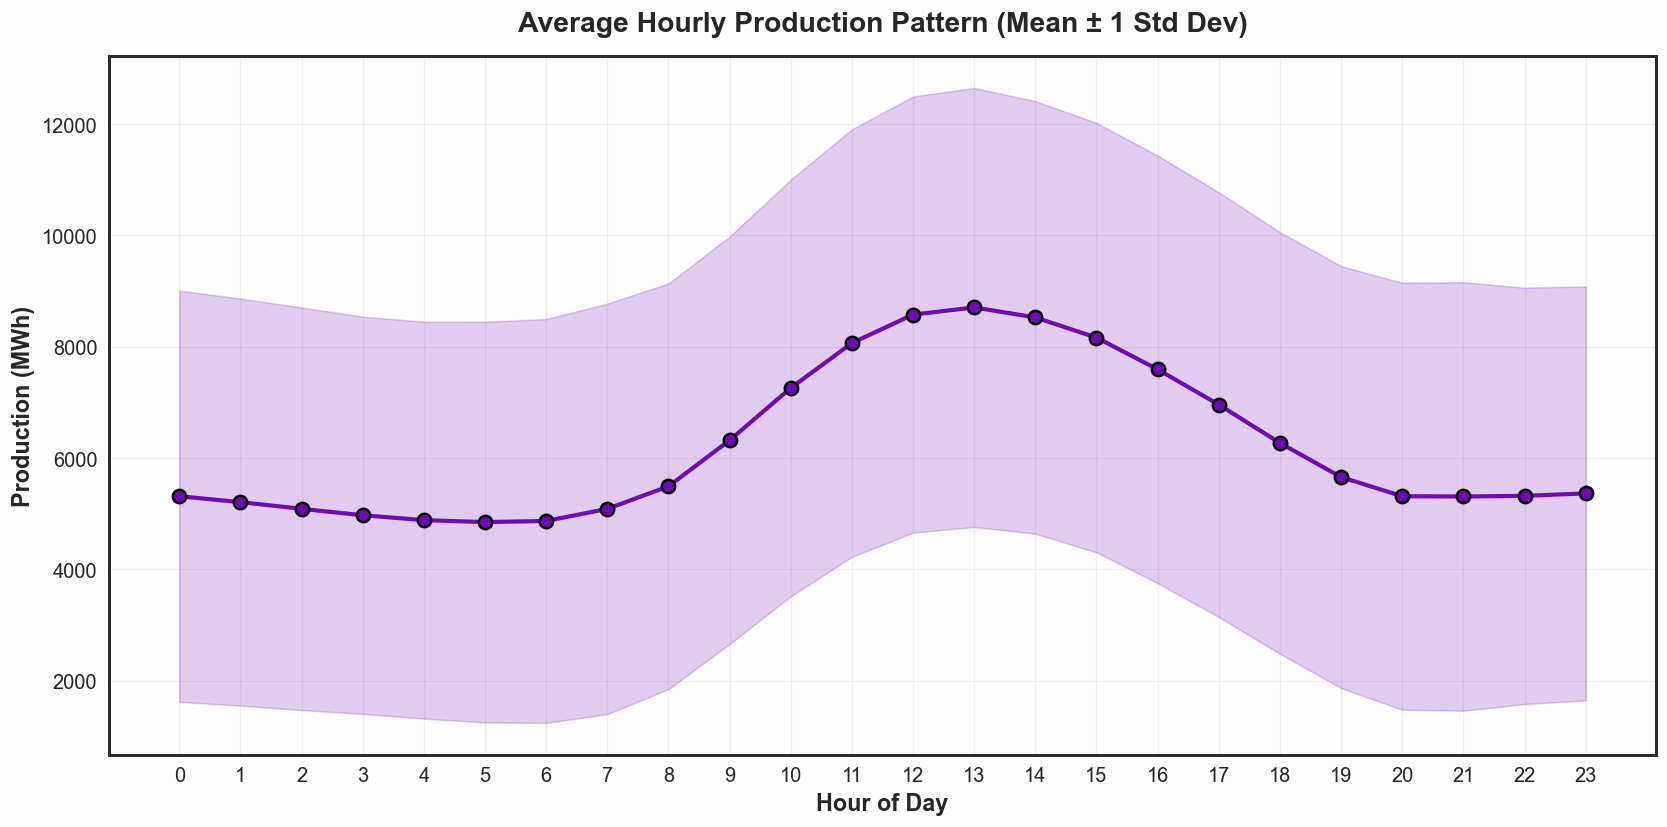

In [48]:
# PLOT 6 — Hourly Production Pattern (mean ± std)
fig, ax = plt.subplots(figsize=(14, 7))
hourly = df.groupby("Start_Hour")["Production"].agg(["mean", "std"])

ax.plot(hourly.index, hourly["mean"], color="#7209B7", linewidth=2.5,
        marker="o", markersize=8, markeredgecolor="black", markeredgewidth=1.5, zorder=3)
ax.fill_between(hourly.index, hourly["mean"] - hourly["std"],
                hourly["mean"] + hourly["std"], alpha=0.2, color="#7209B7")

ax.set_title("Average Hourly Production Pattern (Mean ± 1 Std Dev)", pad=15)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Production (MWh)")
ax.set_xticks(range(0, 24))
ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

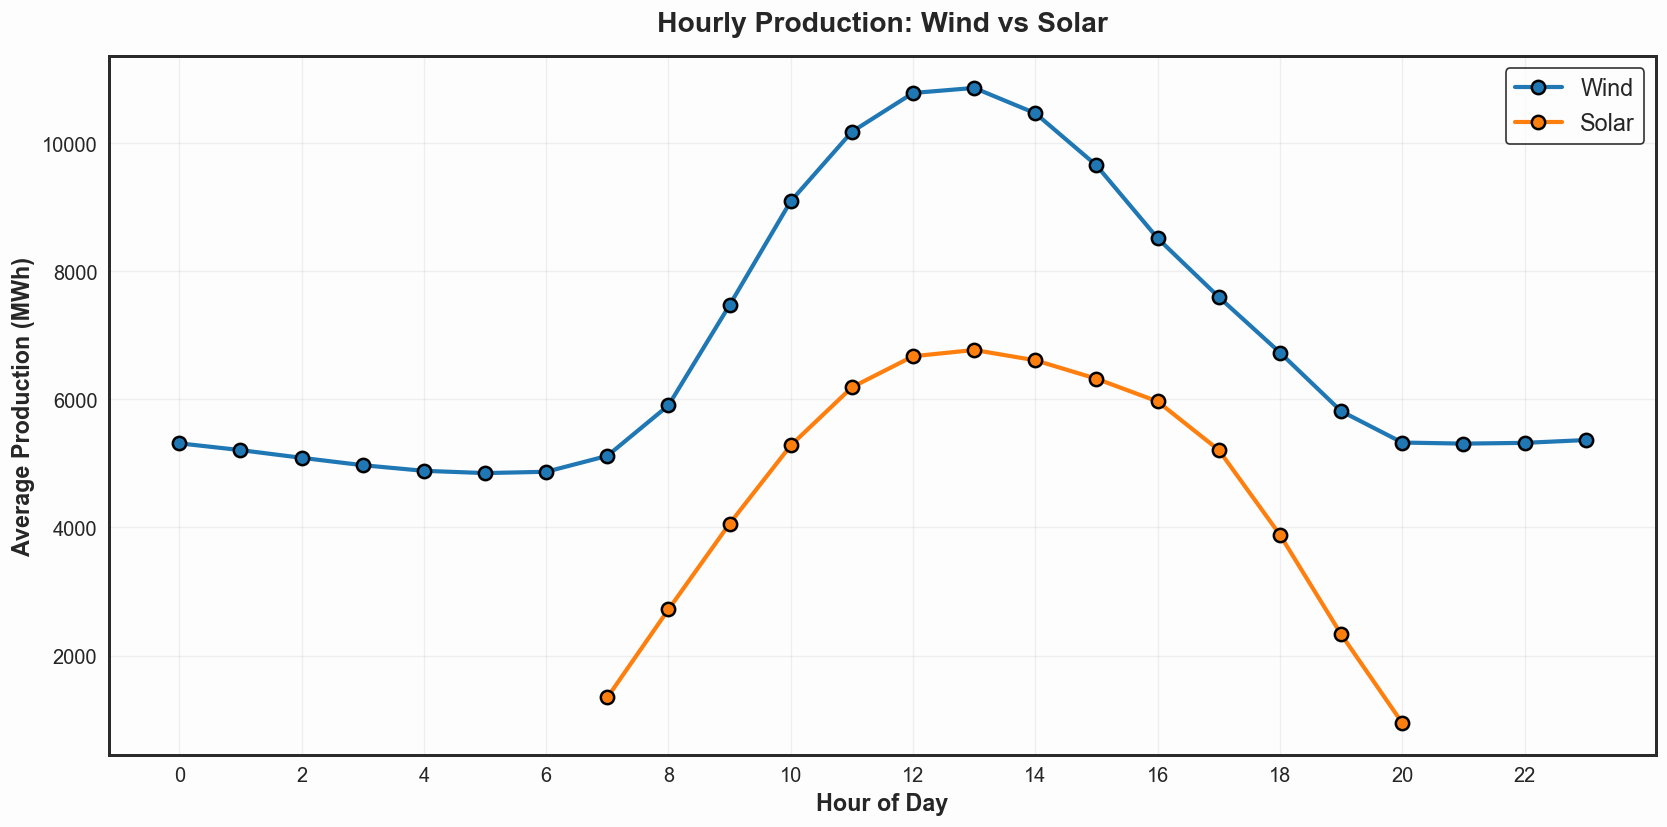

In [49]:
# PLOT 7 — Source-Specific Hourly Patterns
fig, ax = plt.subplots(figsize=(14, 7))
for source, color in [("Wind", COLORS["wind"]), ("Solar", COLORS["solar"])]:
    hourly_s = df[df["Source"] == source].groupby("Start_Hour")["Production"].mean()
    ax.plot(hourly_s.index, hourly_s.values, label=source, linewidth=2.5,
            marker="o", markersize=8, markeredgecolor="black", markeredgewidth=1.5, color=color)

ax.set_title("Hourly Production: Wind vs Solar", pad=15)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Average Production (MWh)")
ax.set_xticks(range(0, 24, 2))
ax.legend(fontsize=14, frameon=True, edgecolor="black")
ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

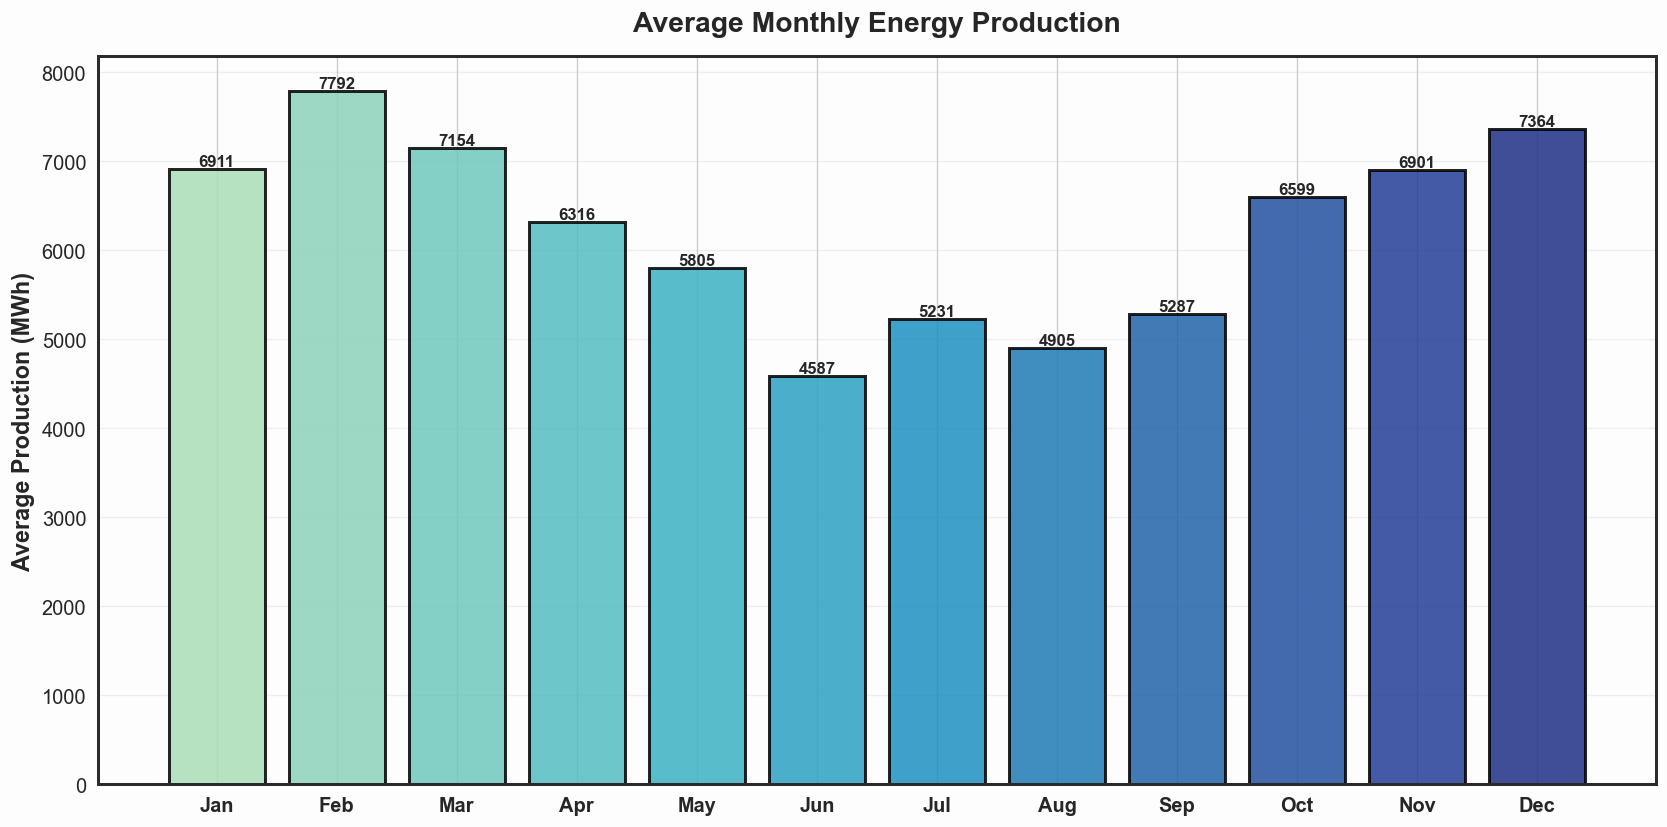

In [50]:
# PLOT 8 — Average Monthly Production (gradient bar)
fig, ax = plt.subplots(figsize=(14, 7))
monthly_avg = df.groupby("Month_Name", observed=True)["Production"].mean()
colors_month = plt.cm.YlGnBu(np.linspace(0.3, 0.9, len(monthly_avg)))

bars = ax.bar(range(len(monthly_avg)), monthly_avg.values,
              color=colors_month, edgecolor="black", linewidth=1.8, alpha=0.85)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h, f"{h:.0f}",
            ha="center", va="bottom", fontsize=10, fontweight="bold")

ax.set_xticks(range(len(monthly_avg)))
ax.set_xticklabels([m[:3] for m in monthly_avg.index], fontsize=12, fontweight="bold")
ax.set_title("Average Monthly Energy Production", pad=15)
ax.set_ylabel("Average Production (MWh)")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout(); plt.show()

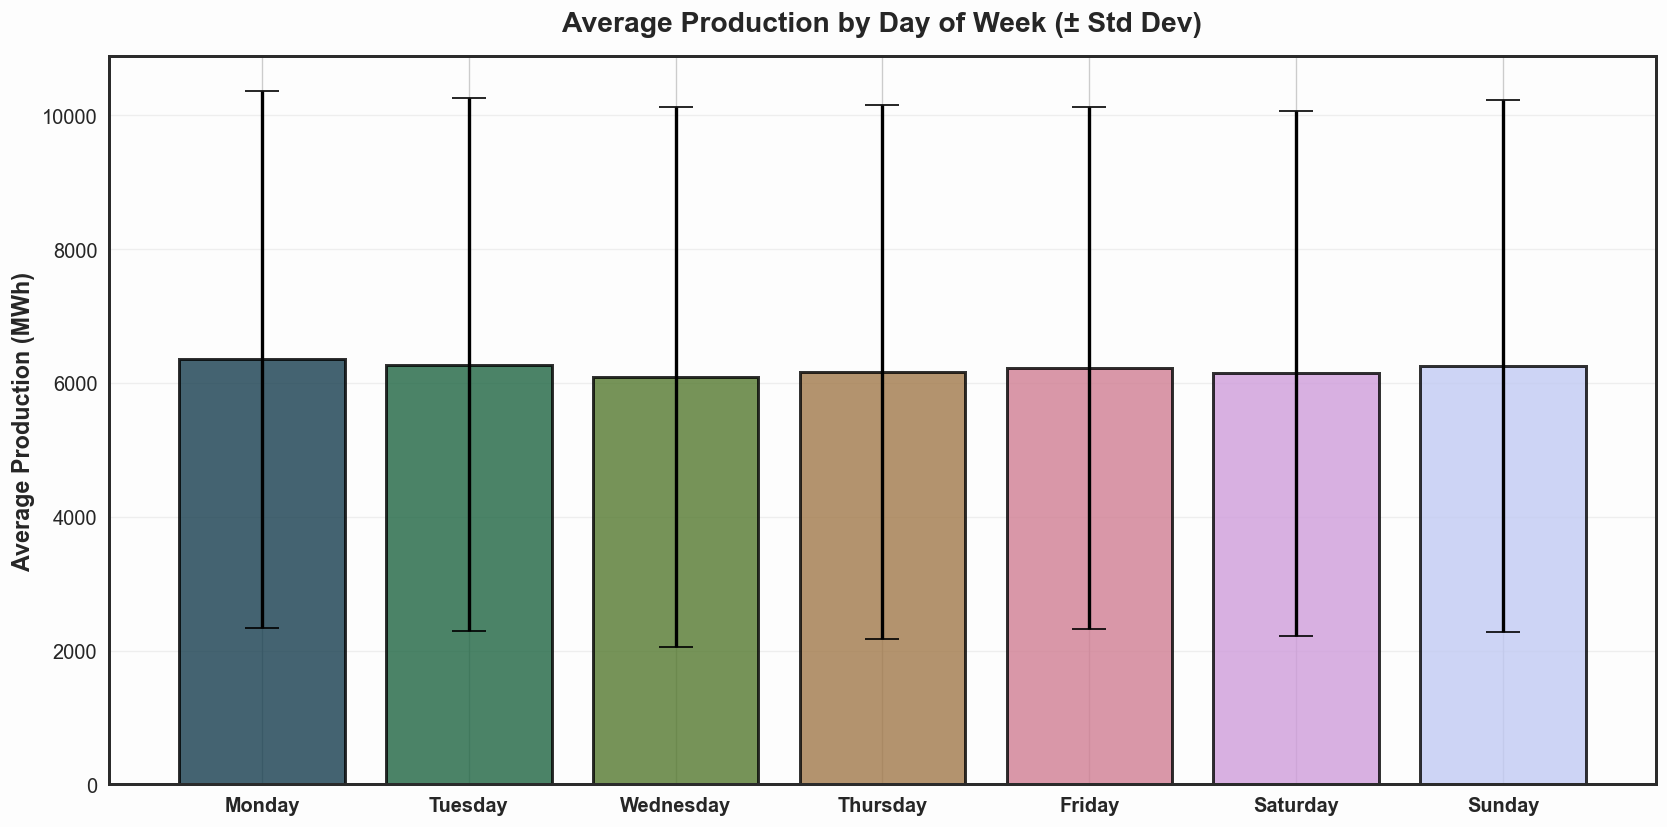

In [51]:
# PLOT 9 — Day-of-Week with Error Bars
fig, ax = plt.subplots(figsize=(14, 7))
day_stats = df.groupby("Day_Name", observed=True)["Production"].agg(["mean", "std"])
colors_day = plt.cm.cubehelix(np.linspace(0.2, 0.8, len(day_stats)))

bars = ax.bar(range(len(day_stats)), day_stats["mean"].values,
              yerr=day_stats["std"].values, color=colors_day,
              edgecolor="black", linewidth=1.8, capsize=10,
              error_kw={"elinewidth": 2, "ecolor": "black"}, alpha=0.8)

ax.set_xticks(range(len(day_stats)))
ax.set_xticklabels(day_stats.index, fontsize=12, fontweight="bold")
ax.set_title("Average Production by Day of Week (± Std Dev)", pad=15)
ax.set_ylabel("Average Production (MWh)")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout(); plt.show()

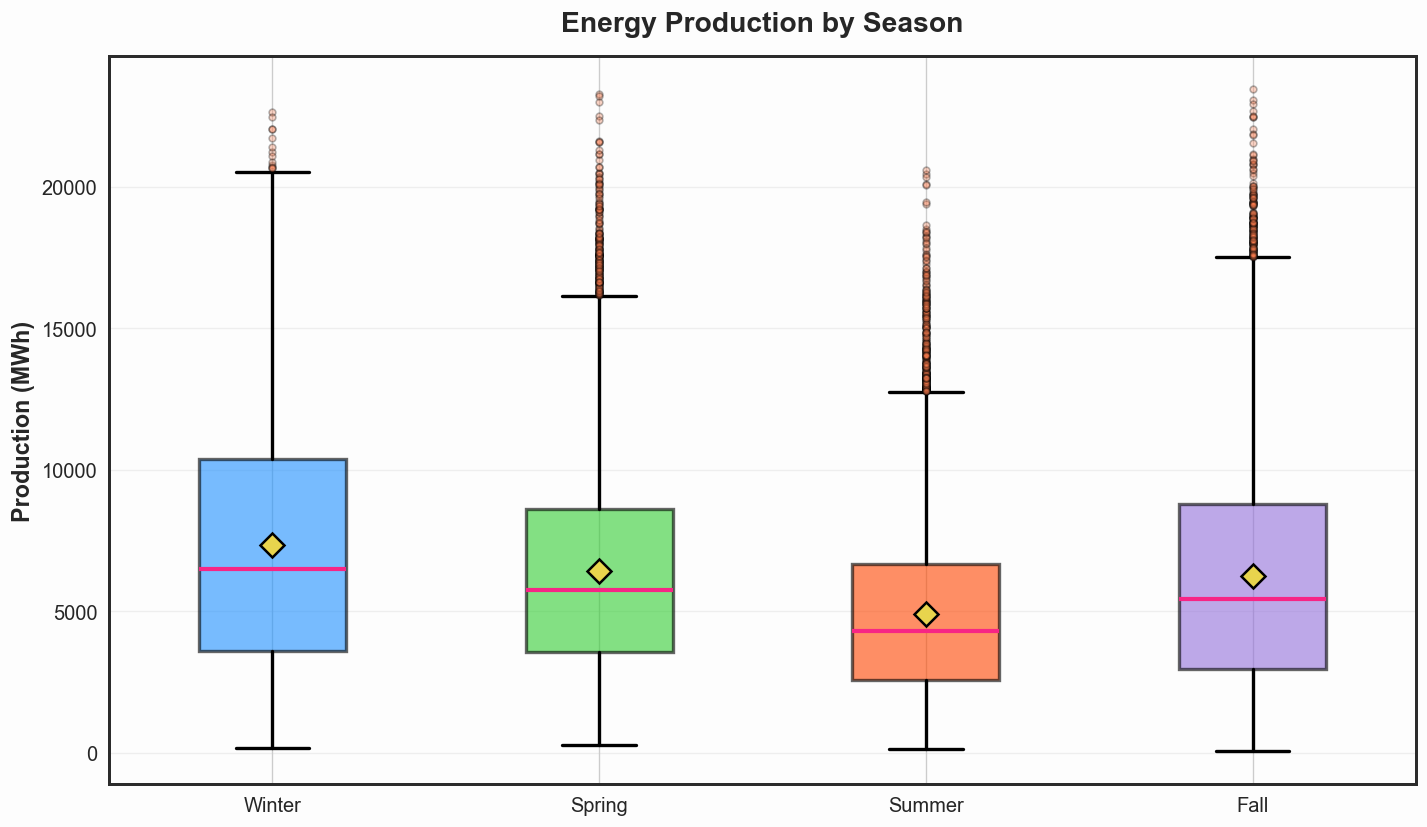

In [52]:
# PLOT 10 — Seasonal Box Plot with Mean Diamonds
fig, ax = plt.subplots(figsize=(12, 7))
bp = ax.boxplot(
    [df[df["Season"] == s]["Production"].values for s in season_order],
    labels=season_order, patch_artist=True,
    boxprops=dict(linewidth=2), whiskerprops=dict(linewidth=2),
    capprops=dict(linewidth=2), medianprops=dict(color="#F72585", linewidth=2.5),
    flierprops=dict(marker="o", markerfacecolor="coral", markersize=4, alpha=0.3),
)
for patch, s in zip(bp["boxes"], season_order):
    patch.set_facecolor(SEASON_COLORS[s]); patch.set_alpha(0.6)

for i, s in enumerate(season_order, 1):
    m = df[df["Season"] == s]["Production"].mean()
    ax.plot(i, m, marker="D", markersize=10, color="#E8D44D",
            markeredgecolor="black", markeredgewidth=1.5, zorder=5)

ax.set_title("Energy Production by Season", pad=15)
ax.set_ylabel("Production (MWh)")
ax.grid(True, axis="y", alpha=0.3)
plt.tight_layout(); plt.show()

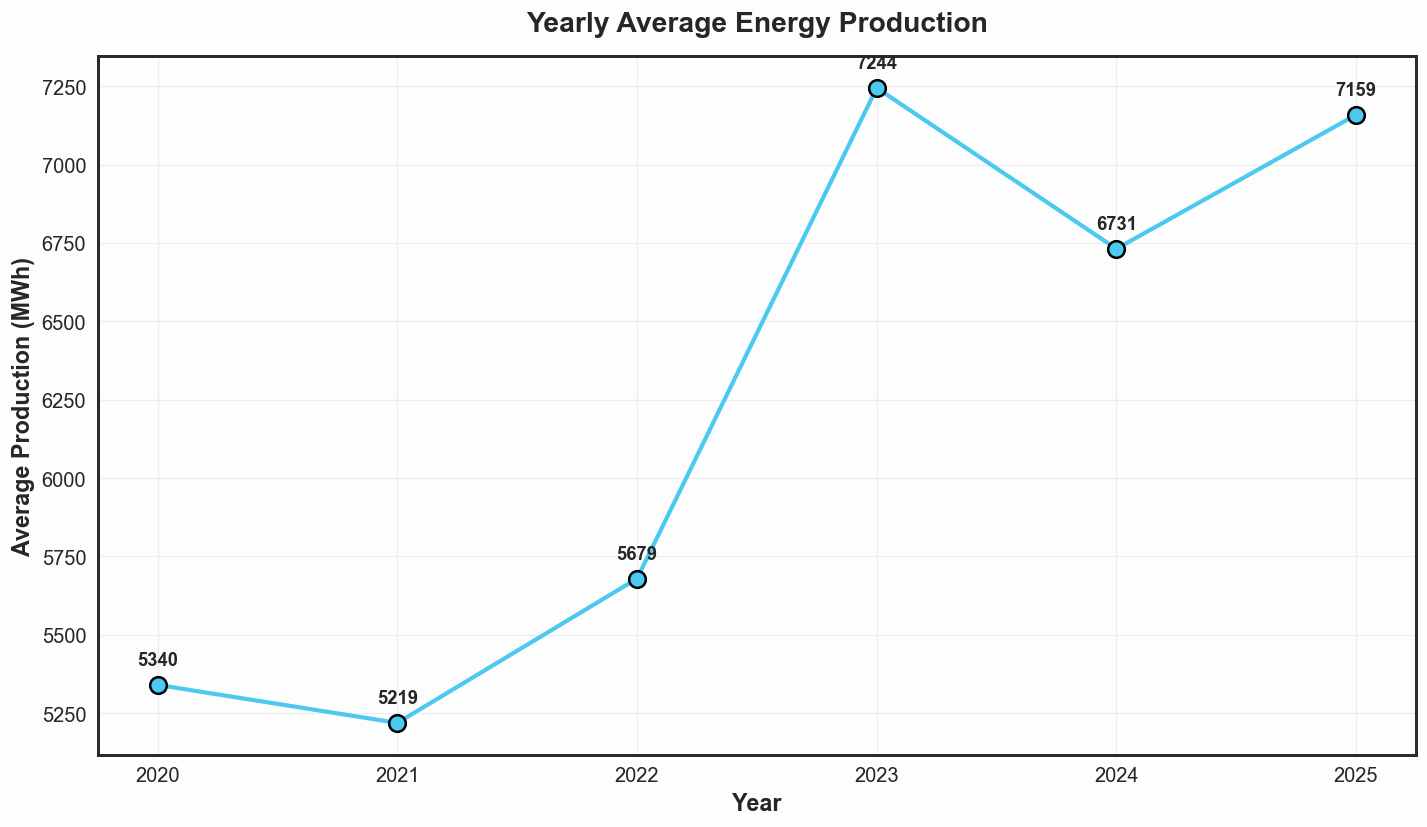

In [53]:
# PLOT 11 — Yearly Average Production Trend
fig, ax = plt.subplots(figsize=(12, 7))
yearly = df.groupby("Year")["Production"].mean()

ax.plot(yearly.index, yearly.values, color="#4CC9F0", linewidth=2.5,
        marker="o", markersize=10, markeredgecolor="black", markeredgewidth=1.5, zorder=3)
for x, y in zip(yearly.index, yearly.values):
    ax.annotate(f"{y:.0f}", (x, y), textcoords="offset points",
                xytext=(0, 12), ha="center", fontsize=11, fontweight="bold")

ax.set_title("Yearly Average Energy Production", pad=15)
ax.set_xlabel("Year"); ax.set_ylabel("Average Production (MWh)")
ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

### 📌 Key Observation — Temporal Patterns

1. **Hourly:** Production peaks at **13:00 (1 PM)** — driven by solar irradiance. Wind stays relatively flat across hours, while solar shows a dramatic bell-curve peaking at midday.
2. **Monthly:** **February** and **December** lead — winter months when wind speeds are highest in France. June is the lowest — despite peak solar hours, overall wind drops significantly.
3. **Day-of-Week:** Near-uniform across days — energy production is weather-driven, not human-schedule-driven. Slight Monday peak is likely noise.
4. **Seasonal:** **Winter > Fall > Spring > Summer** — France's renewable mix is wind-heavy, and winter windstorms drive production.
5. **Yearly:** A notable **upward jump between 2022→2023** suggests capacity additions or improved efficiency — not just weather variation.

---
## 9. 🗺 Heatmaps & Cross-tabulations

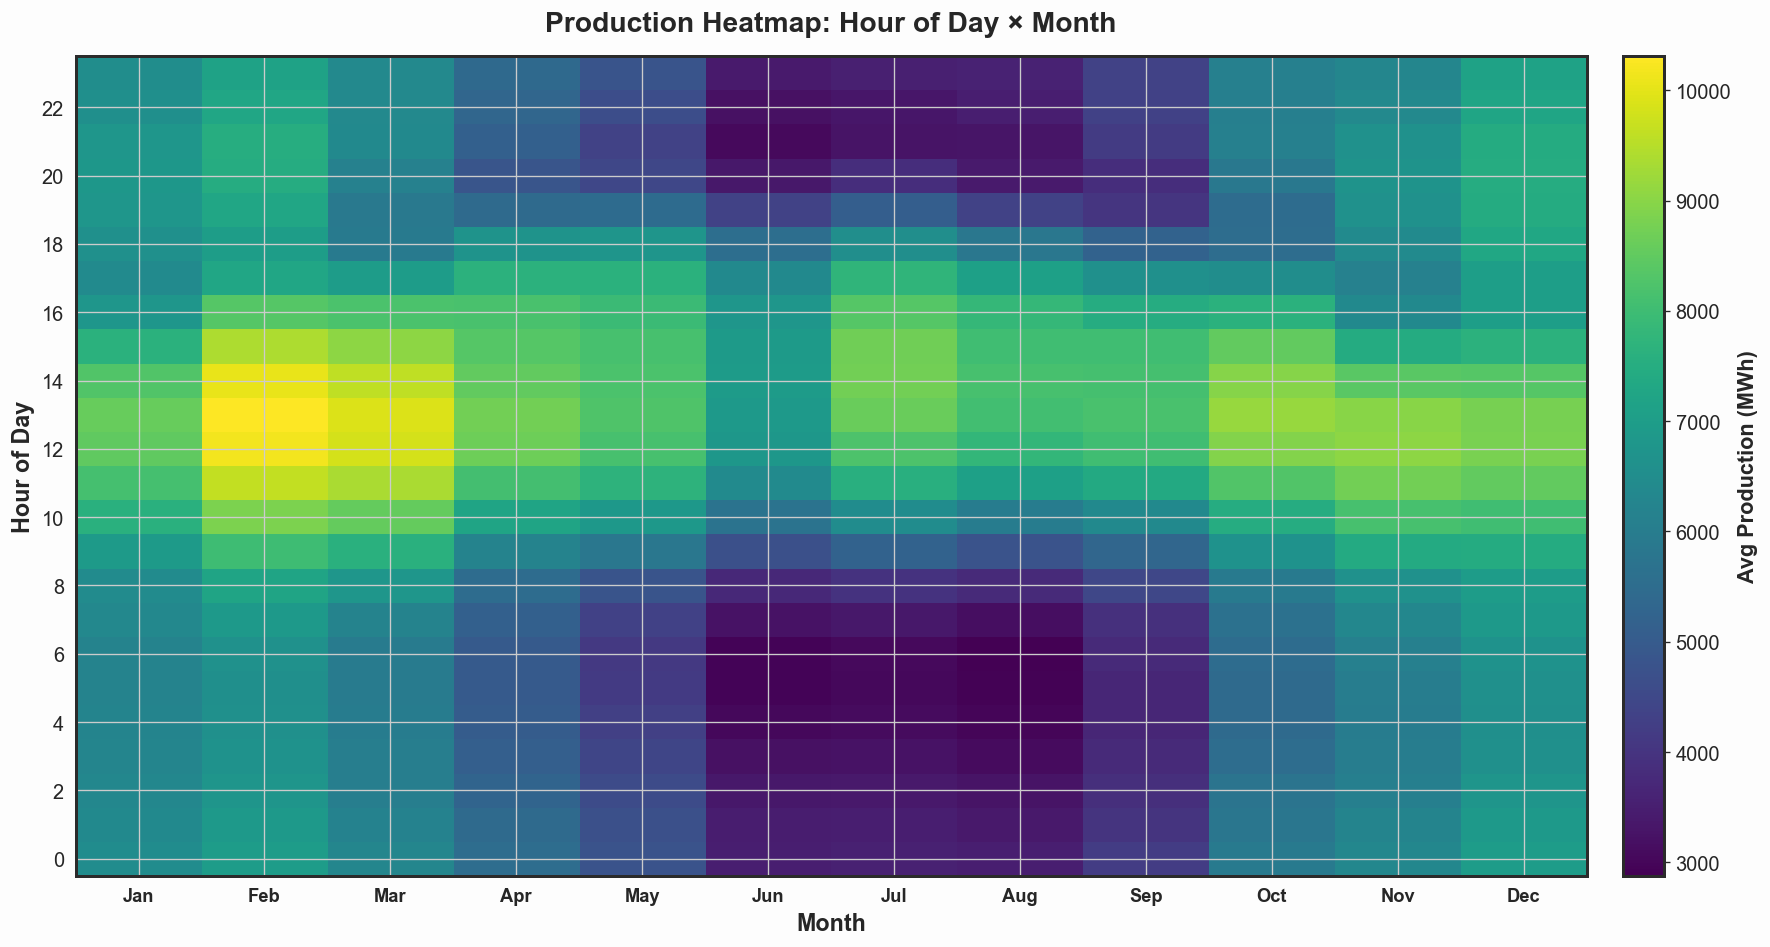

In [54]:
# PLOT 12 — Hour × Month Heatmap
fig, ax = plt.subplots(figsize=(16, 8))
heatmap_data = df.pivot_table(values="Production", index="Start_Hour",
                               columns="Month_Name", aggfunc="mean", observed=True)
im = ax.imshow(heatmap_data.values, cmap="viridis", aspect="auto", origin="lower")

ax.set_title("Production Heatmap: Hour of Day × Month", pad=15)
ax.set_xlabel("Month"); ax.set_ylabel("Hour of Day")
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels([m[:3] for m in heatmap_data.columns], fontsize=11, fontweight="bold")
ax.set_yticks(range(0, 24, 2)); ax.set_yticklabels(range(0, 24, 2))

cbar = plt.colorbar(im, ax=ax, pad=0.02)
cbar.set_label("Avg Production (MWh)", fontsize=13, fontweight="bold")
plt.tight_layout(); plt.show()

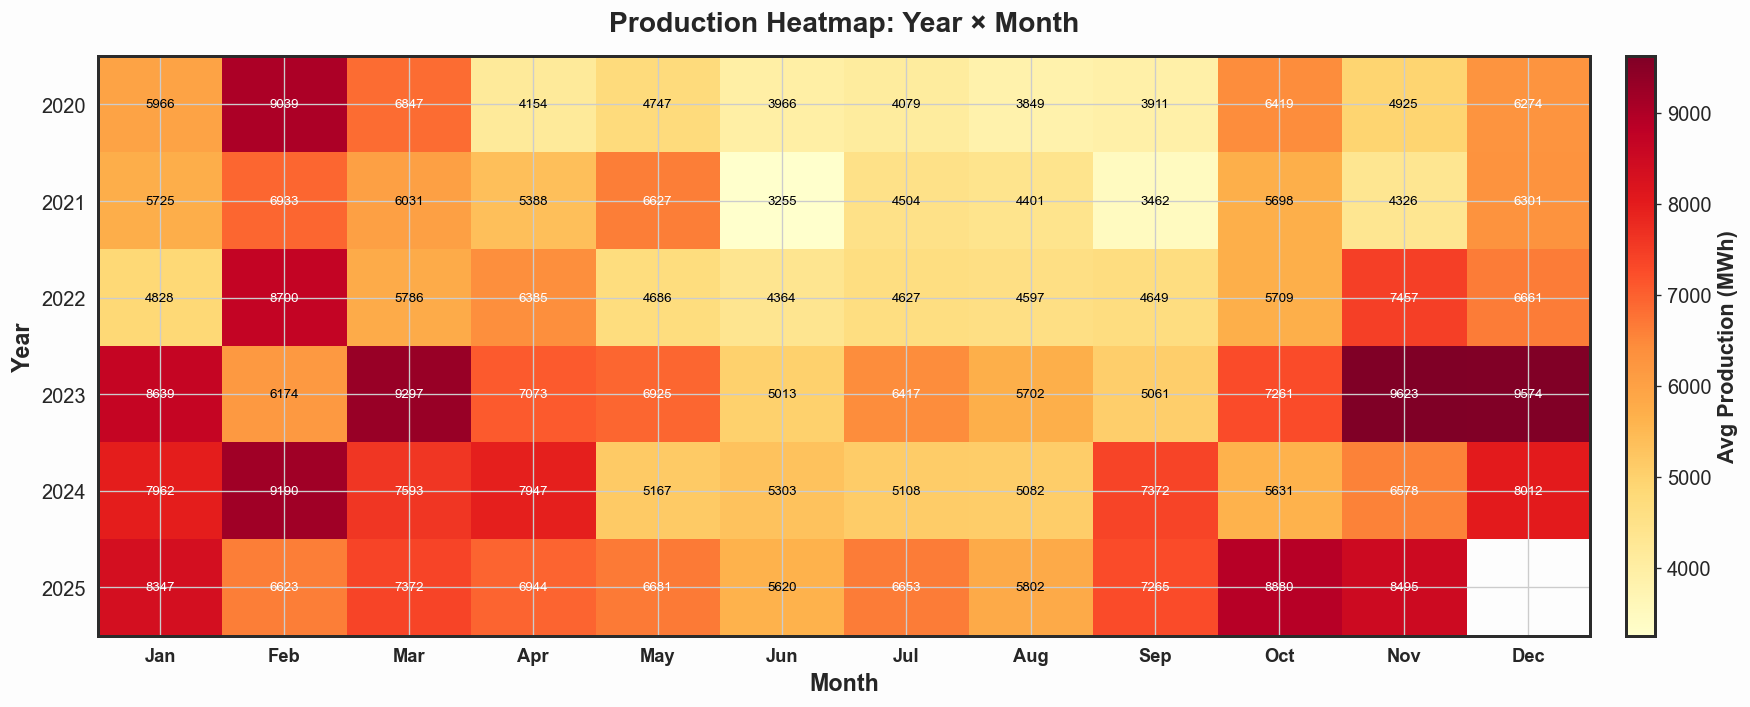

In [55]:
# PLOT 13 — Year × Month Heatmap
fig, ax = plt.subplots(figsize=(16, 6))
ym_data = df.pivot_table(values="Production", index="Year", columns="Month", aggfunc="mean")
im = ax.imshow(ym_data.values, cmap="YlOrRd", aspect="auto")

ax.set_title("Production Heatmap: Year × Month", pad=15)
ax.set_xlabel("Month"); ax.set_ylabel("Year")
ax.set_xticks(range(ym_data.shape[1]))
ax.set_xticklabels([m[:3] for m in month_order], fontsize=11, fontweight="bold")
ax.set_yticks(range(ym_data.shape[0]))
ax.set_yticklabels(ym_data.index.astype(int))

for i in range(ym_data.shape[0]):
    for j in range(ym_data.shape[1]):
        val = ym_data.iloc[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.0f}", ha="center", va="center", fontsize=8,
                    color="white" if val > ym_data.values[~np.isnan(ym_data.values)].mean() else "black")

cbar = plt.colorbar(im, ax=ax, pad=0.02)
cbar.set_label("Avg Production (MWh)", fontsize=13, fontweight="bold")
plt.tight_layout(); plt.show()

### 📌 Key Observation — Heatmaps

- **Hour × Month:** The heatmap clearly shows the **solar peak band** (10:00–15:00) intensifying during May–August, while **winter months show high production throughout evening/night hours** driven by wind.
- **Year × Month:** 2023 onward shows a visible brightening (higher production) across most months compared to 2020–2022, confirming the structural upward trend.

---
## 10. 🔗 Correlation & Variability Analysis

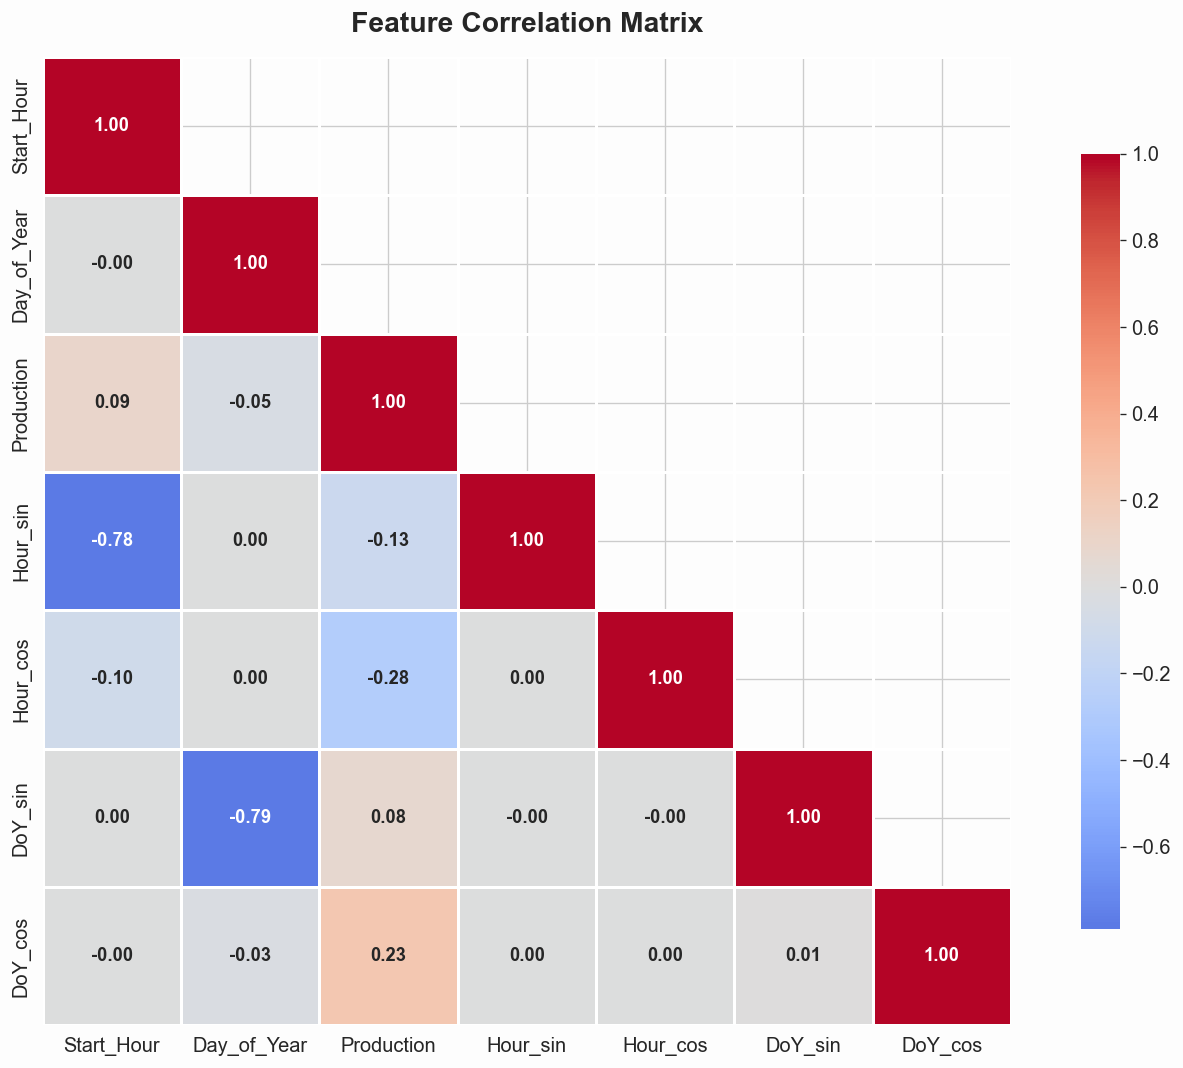

In [56]:
# PLOT 14 — Correlation Heatmap
fig, ax = plt.subplots(figsize=(12, 9))
numeric_cols = ["Start_Hour", "Day_of_Year", "Production", "Hour_sin", "Hour_cos", "DoY_sin", "DoY_cos"]
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 11, "weight": "bold"}, ax=ax)
ax.set_title("Feature Correlation Matrix", pad=15)
plt.tight_layout(); plt.show()

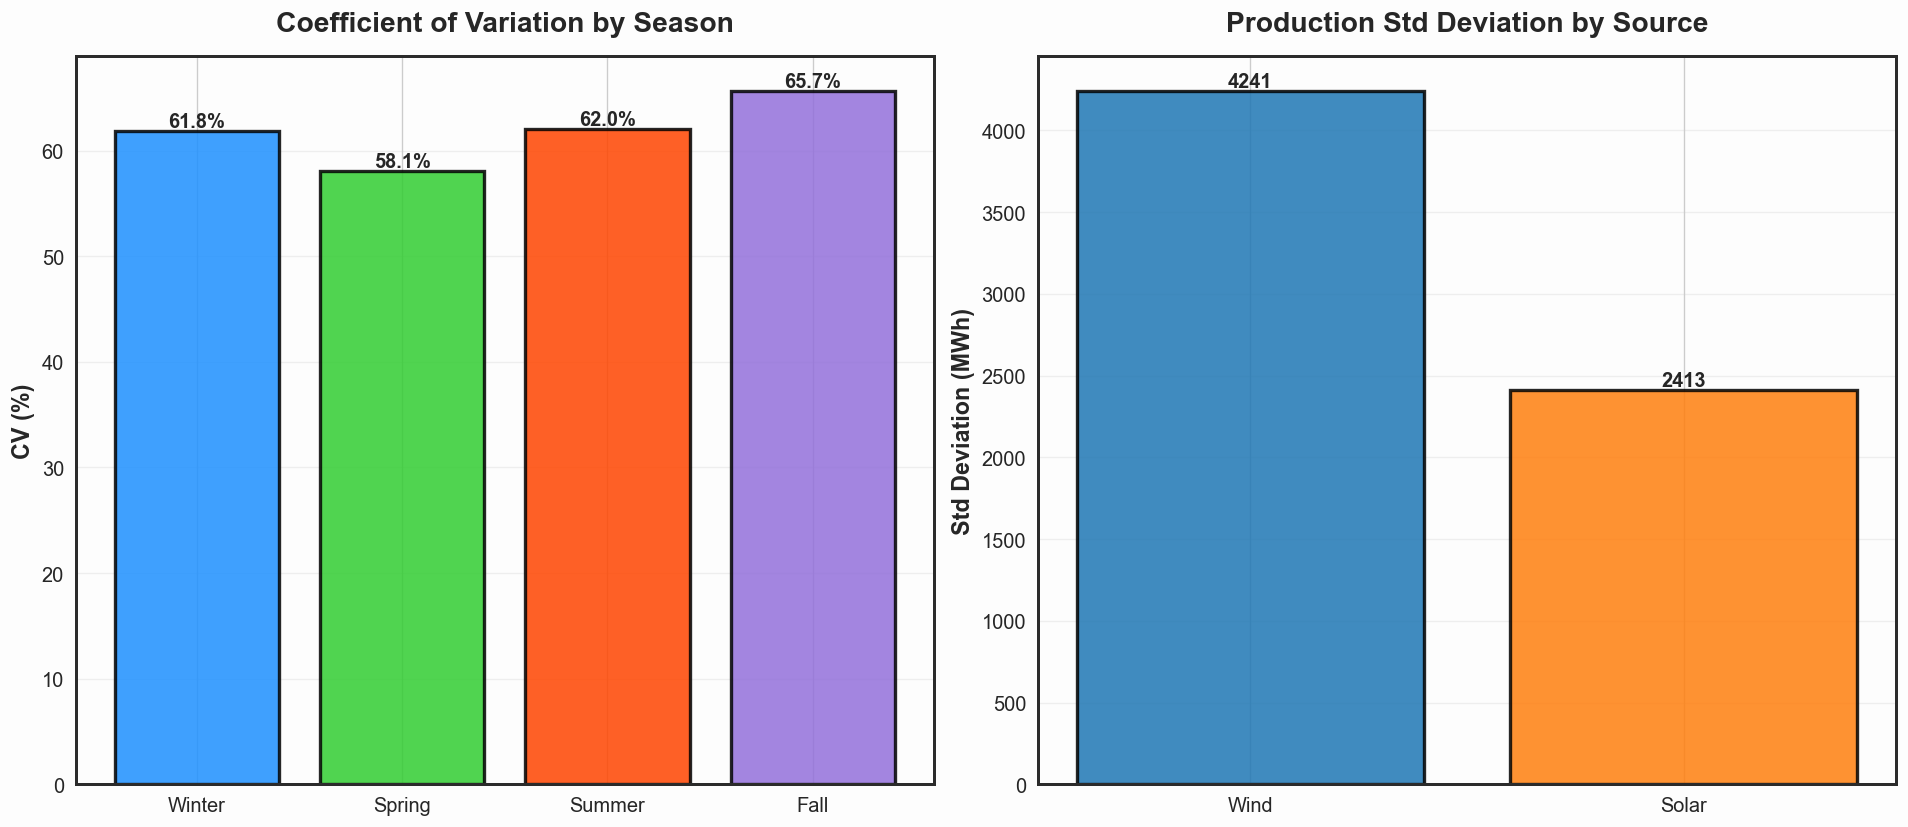

In [57]:
# PLOT 15 — Production Variability (CV% by Season + Std by Source)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# CV by season
cv_season = []
for s in season_order:
    d = df[df["Season"] == s]["Production"]
    cv_season.append((d.std() / d.mean()) * 100)

bars1 = ax1.bar(season_order, cv_season,
                color=[SEASON_COLORS[s] for s in season_order],
                edgecolor="black", linewidth=2, alpha=0.85)
for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, h, f"{h:.1f}%",
             ha="center", va="bottom", fontsize=12, fontweight="bold")
ax1.set_title("Coefficient of Variation by Season", pad=15)
ax1.set_ylabel("CV (%)")
ax1.grid(True, axis="y", alpha=0.3)

# Std by source
std_source = df.groupby("Source")["Production"].std().sort_values(ascending=False)
bars2 = ax2.bar(std_source.index, std_source.values,
                color=[COLORS["wind"], COLORS["solar"]], edgecolor="black", linewidth=2, alpha=0.85)
for bar in bars2:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, h, f"{h:.0f}",
             ha="center", va="bottom", fontsize=12, fontweight="bold")
ax2.set_title("Production Std Deviation by Source", pad=15)
ax2.set_ylabel("Std Deviation (MWh)")
ax2.grid(True, axis="y", alpha=0.3)

plt.tight_layout(); plt.show()

### 📌 Key Observation — Correlation & Variability

- **Hour_cos** (peak at midday, trough at midnight) has the **strongest correlation** with Production — confirming the solar-driven midday peak.
- **Day_of_Year** has very weak linear correlation, but this is **misleading** — the relationship is cyclical (revealed by sin/cos encoding).
- **Wind has higher standard deviation** than Solar — it's more unpredictable. This is critical for grid balancing: solar is easier to forecast because it follows a known diurnal pattern.
- All seasons have similar CV (~60–68%), meaning **variability is inherent to renewables** and not season-specific.

---
## 11. 📉 Time-Series Deep Dive

In [58]:
# Aggregate to daily totals
df_ts = df.groupby("Date")["Production"].sum().sort_index().reset_index()
df_ts.columns = ["Date", "Production"]
print(f"Daily time-series: {len(df_ts)} days")
df_ts.head()

Daily time-series: 2161 days


Date  Production
0 2020-01-01       47222
1 2020-01-02       89374
2 2020-01-03      179487
3 2020-01-04       84640
4 2020-01-05       49253

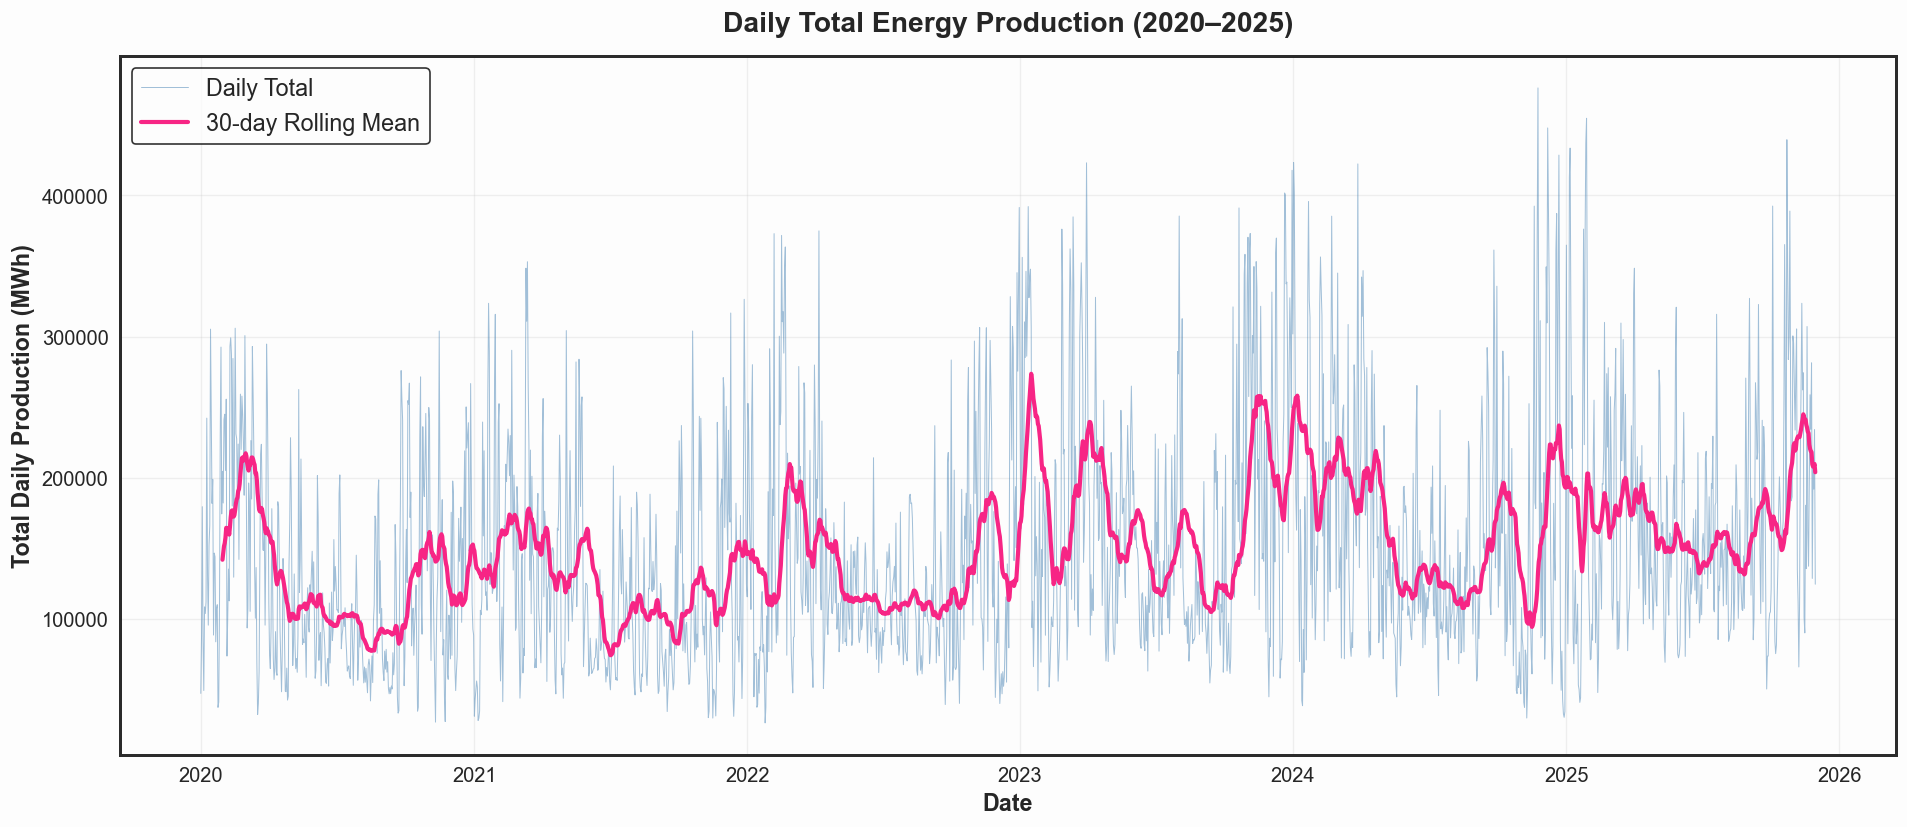

In [59]:
# PLOT 16 — Daily Production + 30-day Rolling Mean
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(df_ts["Date"], df_ts["Production"], linewidth=0.6, alpha=0.5, color="steelblue", label="Daily Total")
rolling = df_ts["Production"].rolling(window=30).mean()
ax.plot(df_ts["Date"], rolling, linewidth=2.5, color="#F72585", label="30-day Rolling Mean")

ax.set_title("Daily Total Energy Production (2020–2025)", pad=15)
ax.set_xlabel("Date"); ax.set_ylabel("Total Daily Production (MWh)")
ax.legend(fontsize=14, frameon=True, edgecolor="black")
ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

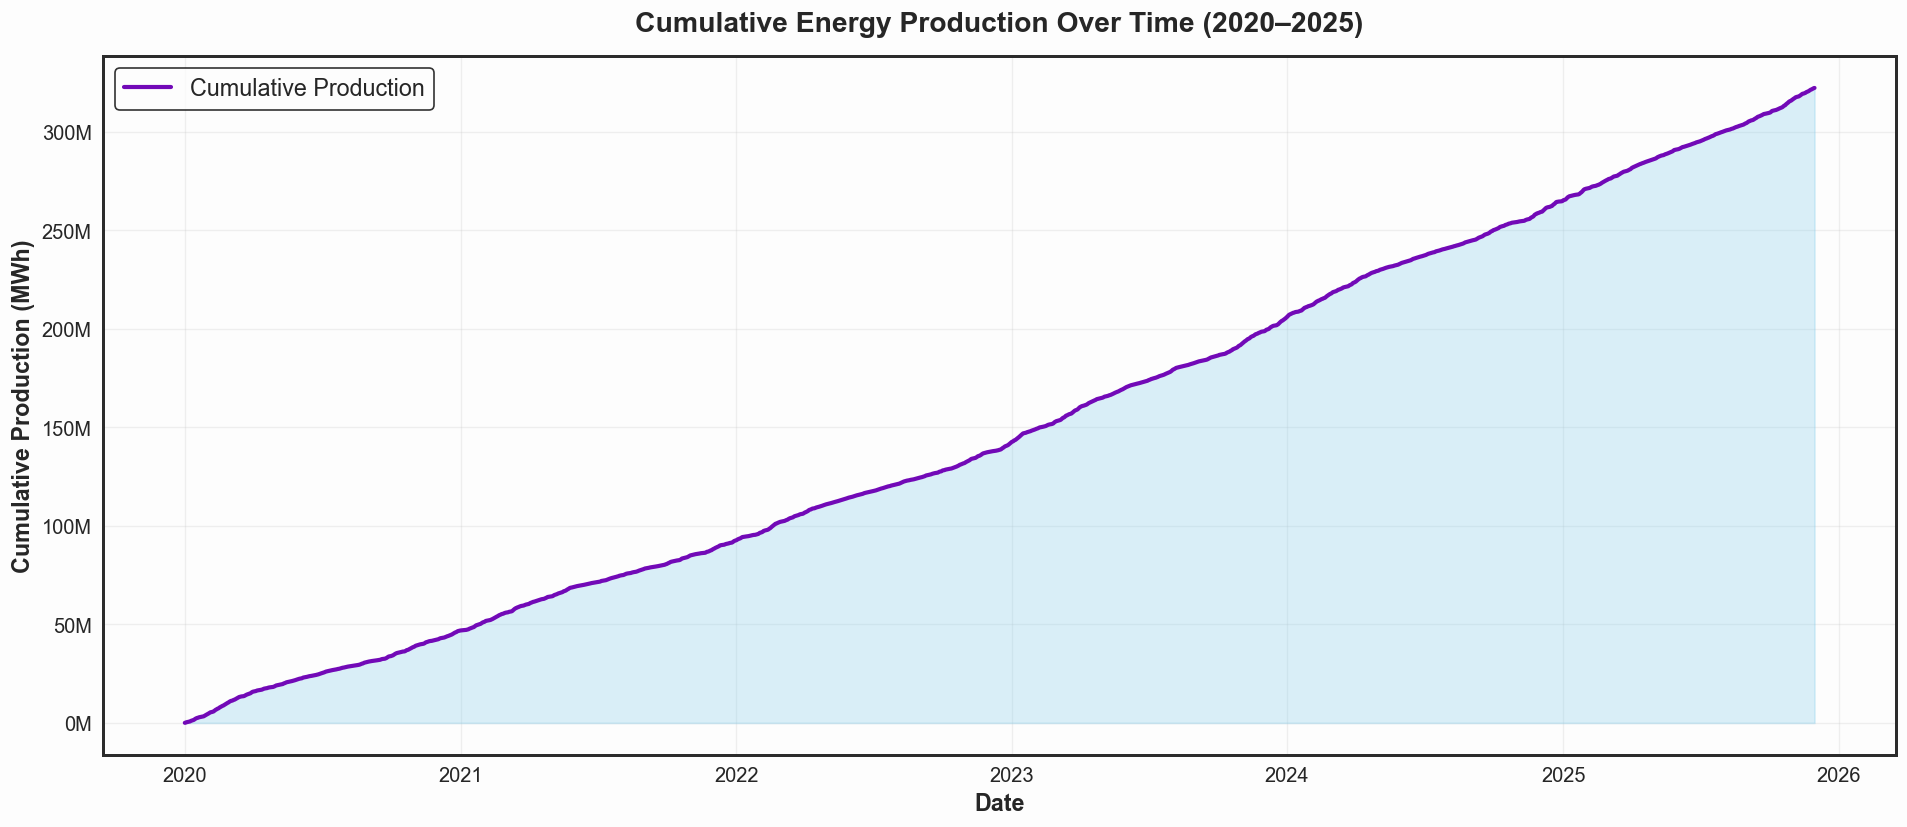

In [60]:
# PLOT 17 — Cumulative Production
fig, ax = plt.subplots(figsize=(16, 7))
cumul = df_ts["Production"].cumsum()
ax.fill_between(df_ts["Date"], cumul, alpha=0.3, color="skyblue")
ax.plot(df_ts["Date"], cumul, color="#7209B7", linewidth=2.5, label="Cumulative Production")

ax.set_title("Cumulative Energy Production Over Time (2020–2025)", pad=15)
ax.set_xlabel("Date"); ax.set_ylabel("Cumulative Production (MWh)")
ax.legend(fontsize=14, frameon=True, edgecolor="black")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}M"))
ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

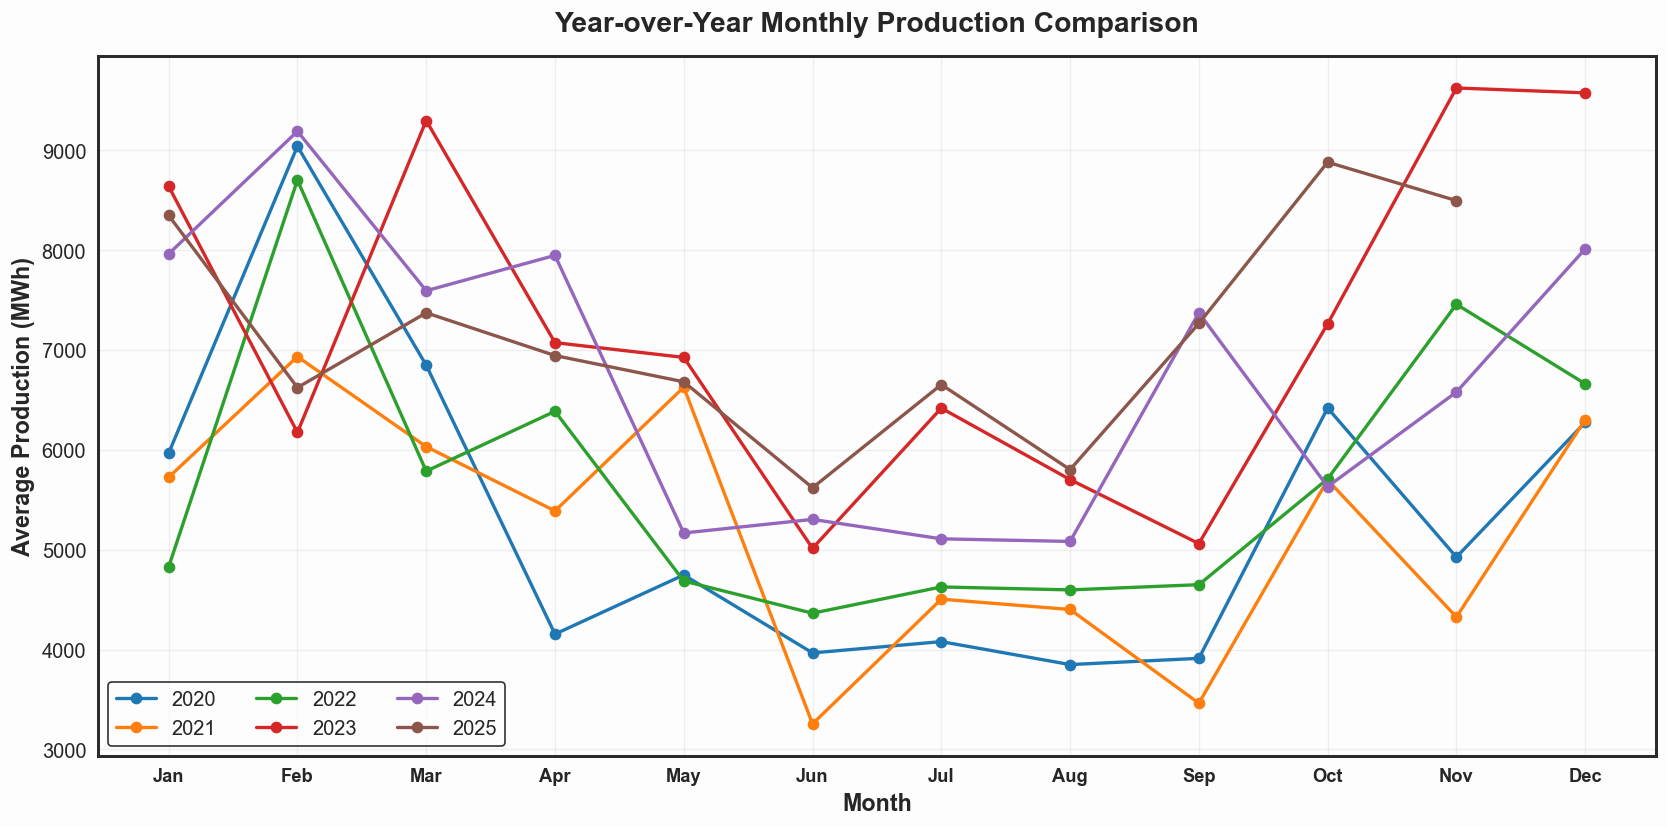

In [61]:
# PLOT 18 — Year-over-Year Monthly Comparison
fig, ax = plt.subplots(figsize=(14, 7))
for year in sorted(df["Year"].unique()):
    yd = df[df["Year"] == year].groupby("Month")["Production"].mean()
    ax.plot(yd.index, yd.values, marker="o", linewidth=2, markersize=6, label=str(year))

ax.set_title("Year-over-Year Monthly Production Comparison", pad=15)
ax.set_xlabel("Month"); ax.set_ylabel("Average Production (MWh)")
ax.set_xticks(range(1, 13))
ax.set_xticklabels([m[:3] for m in month_order], fontsize=11, fontweight="bold")
ax.legend(fontsize=12, frameon=True, edgecolor="black", ncol=3)
ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

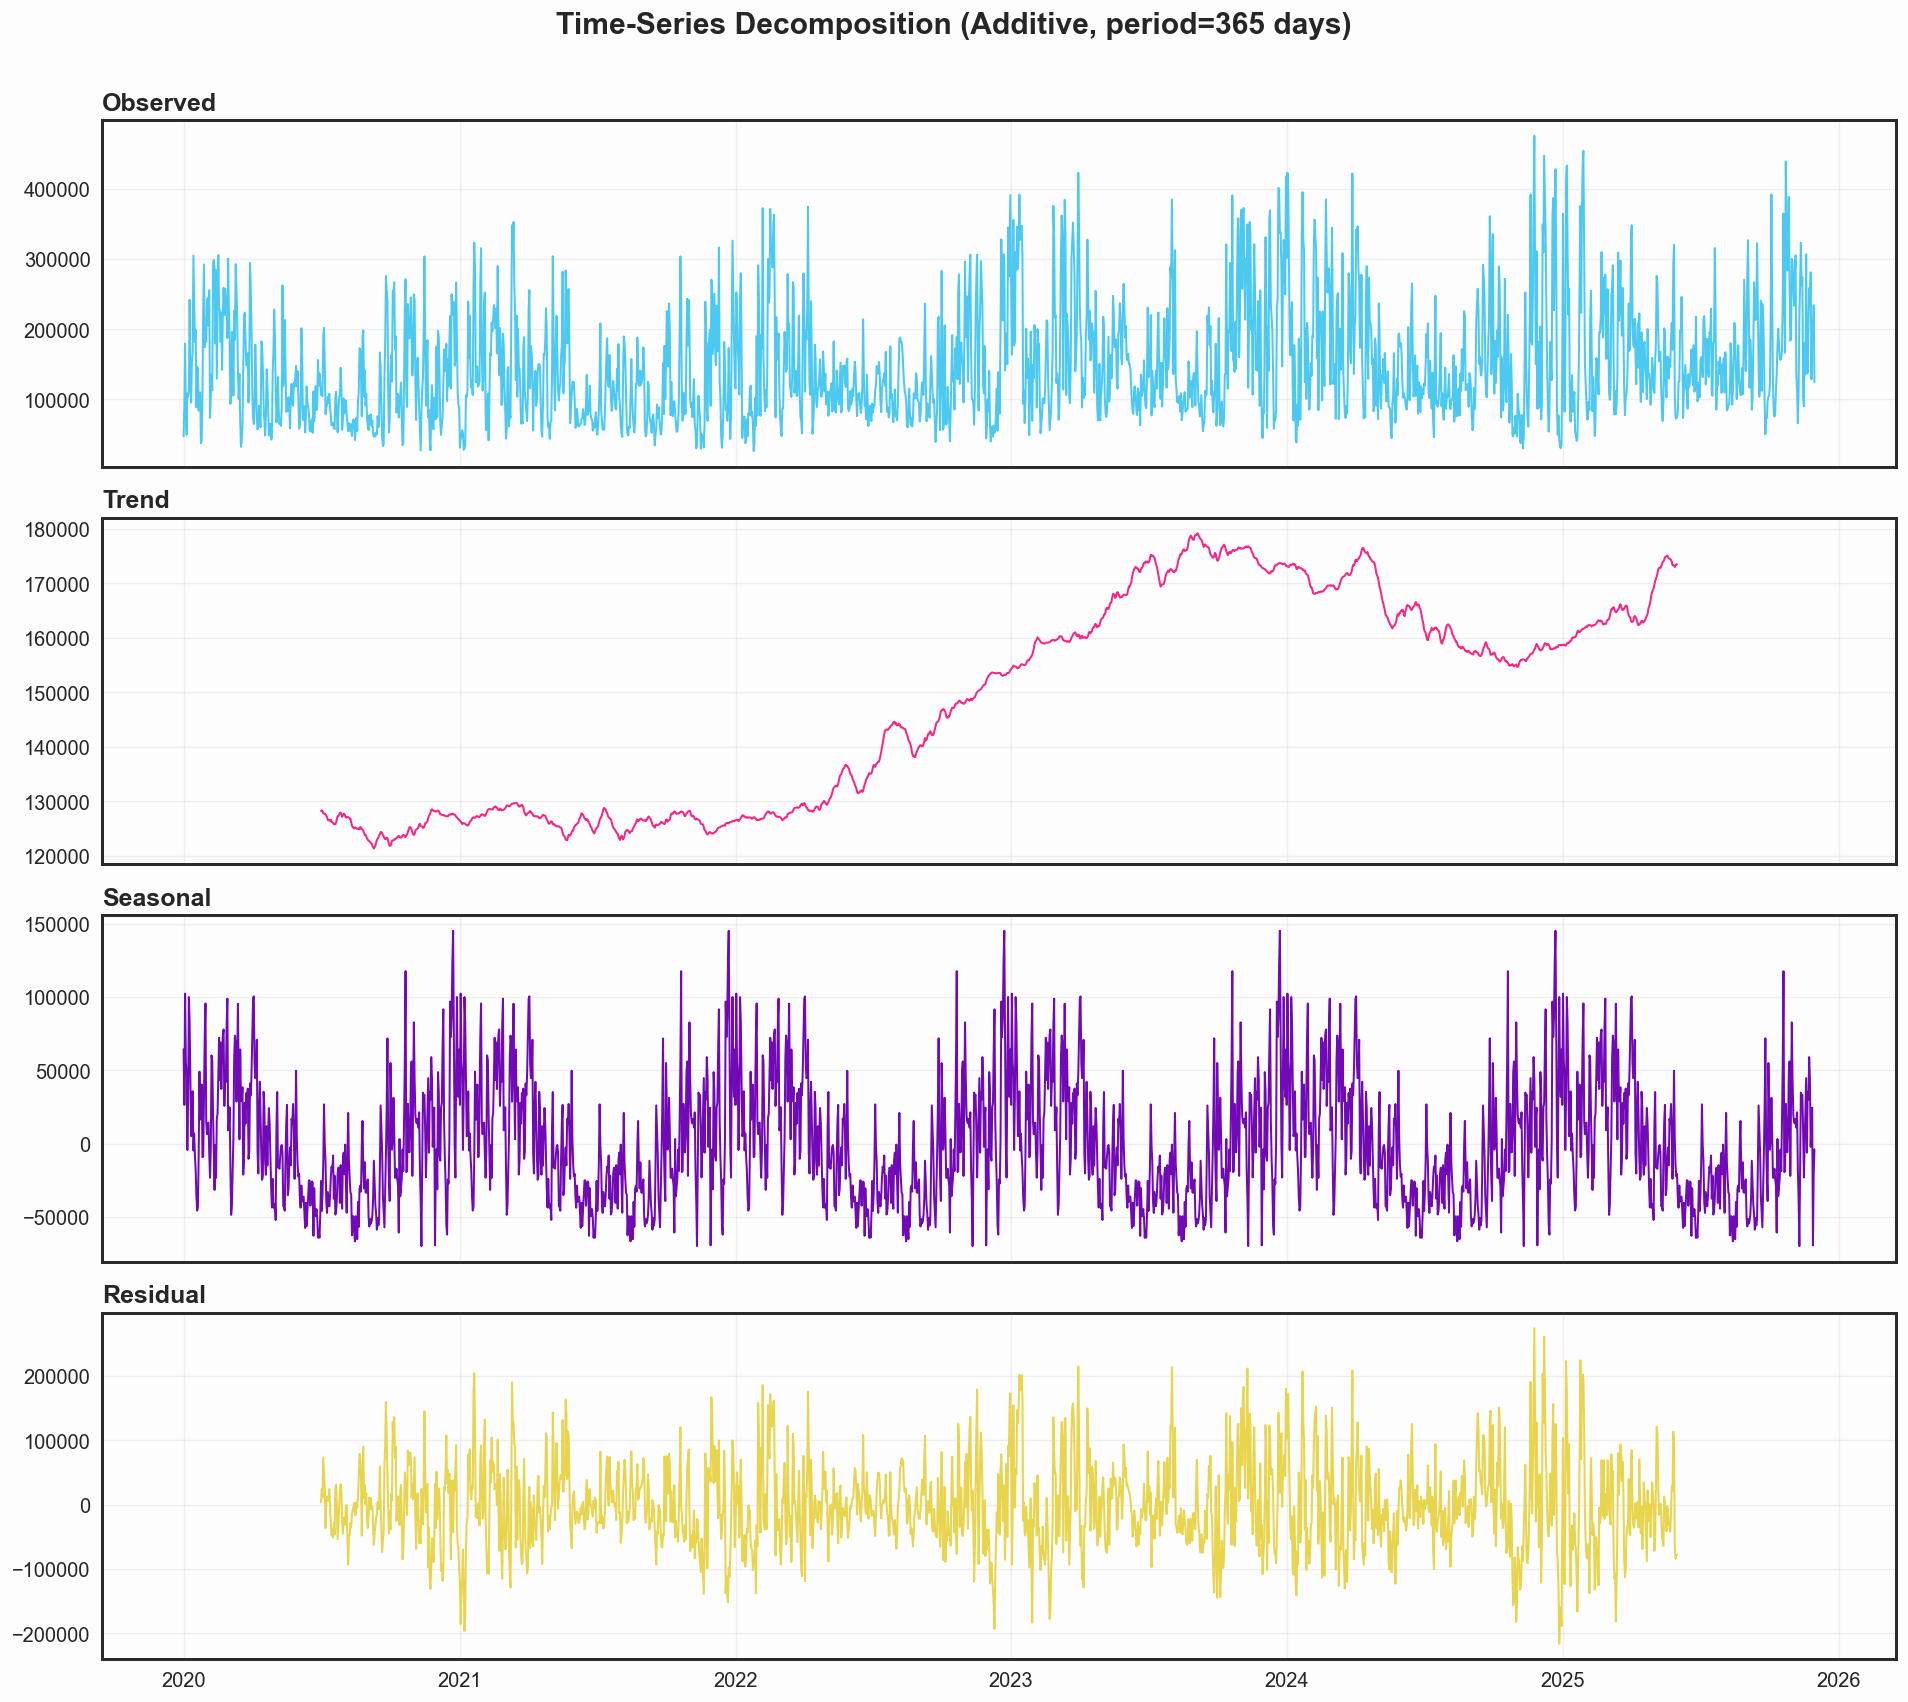

In [62]:
# PLOT 19 — Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df_ts.set_index("Date")["Production"]
decomp = seasonal_decompose(ts, model="additive", period=365)

fig, axes = plt.subplots(4, 1, figsize=(16, 14), sharex=True)
titles = ["Observed", "Trend", "Seasonal", "Residual"]
data   = [decomp.observed, decomp.trend, decomp.seasonal, decomp.resid]
colors = ["#4CC9F0", "#F72585", "#7209B7", "#E8D44D"]

for ax, title, d, c in zip(axes, titles, data, colors):
    ax.plot(d, color=c, linewidth=1.2)
    ax.set_title(title, fontsize=15, fontweight="bold", loc="left")
    ax.grid(True, alpha=0.3)

fig.suptitle("Time-Series Decomposition (Additive, period=365 days)", fontsize=18, fontweight="bold", y=1.01)
plt.tight_layout(); plt.show()

### 📌 Key Observation — Time-Series Deep Dive

- **Trend Component:** Shows a clear **upward trajectory** from 2020 to 2025, consistent with France's expansion of renewable capacity under the EU Green Deal.
- **Seasonal Component:** Strong annual cycle with **winter peaks** and **summer troughs** — confirming wind seasonality as the dominant pattern.
- **Residuals:** High residual variance indicates that significant **short-term weather variability** remains unexplained by seasonal patterns alone — this is the "forecasting challenge."
- **Cumulative Production:** Total renewable energy produced exceeds **322 million MWh** over the 6-year observation window.
- **Year-over-Year:** 2023 consistently outperforms prior years across most months, suggesting **structural capacity gains** rather than just favorable weather conditions.

---
## 12. 🏆 Peak Production & Final Summary

In [63]:
# Peak identification
peak_month = df.groupby("Month_Name", observed=True)["Production"].mean().idxmax()
peak_month_val = df.groupby("Month_Name", observed=True)["Production"].mean().max()

peak_hour = df.groupby("Start_Hour")["Production"].mean().idxmax()
peak_hour_val = df.groupby("Start_Hour")["Production"].mean().max()

peak_season = df.groupby("Season", observed=True)["Production"].mean().idxmax()
peak_season_val = df.groupby("Season", observed=True)["Production"].mean().max()

peak_day = df.groupby("Day_Name", observed=True)["Production"].mean().idxmax()
peak_day_val = df.groupby("Day_Name", observed=True)["Production"].mean().max()

top5_days = df_ts.nlargest(5, "Production")

print("═" * 60)
print("  🏆 PEAK PRODUCTION SUMMARY")
print("═" * 60)
print(f"  Peak Month   : {peak_month}  ({peak_month_val:,.0f} MWh avg)")
print(f"  Peak Hour    : {peak_hour}:00   ({peak_hour_val:,.0f} MWh avg)")
print(f"  Peak Season  : {peak_season}    ({peak_season_val:,.0f} MWh avg)")
print(f"  Peak Day     : {peak_day}  ({peak_day_val:,.0f} MWh avg)")
print(f"\n  Top 5 Highest Production Days:")
for _, row in top5_days.iterrows():
    print(f"    {row['Date'].strftime('%Y-%m-%d')} → {row['Production']:>10,} MWh")
print("═" * 60)

════════════════════════════════════════════════════════════
  🏆 PEAK PRODUCTION SUMMARY
════════════════════════════════════════════════════════════
  Peak Month   : February  (7,792 MWh avg)
  Peak Hour    : 13:00   (8,705 MWh avg)
  Peak Season  : Winter    (7,342 MWh avg)
  Peak Day     : Monday  (6,355 MWh avg)

  Top 5 Highest Production Days:
    2024-11-24 →    476,113 MWh
    2025-01-28 →    454,615 MWh
    2024-12-07 →    447,762 MWh
    2025-10-23 →    439,432 MWh
    2025-01-27 →    437,039 MWh
════════════════════════════════════════════════════════════


---

## 📋 Final Key Findings & Conclusions

### Dataset Summary
| Attribute | Value |
|-----------|-------|
| Total Records | 51,862 (after removing 2 Mixed) |
| Time Coverage | Jan 2020 → Nov 2025 (2,161 days) |
| Data Quality | 100% complete, zero duplicates |
| Total Production | ~322 Million MWh |

### Top Insights

1. **Wind Dominance:** Wind energy accounts for **82%** of all records and is the backbone of France's renewable mix. However, it's inherently more volatile than solar.

2. **Solar Predictability:** Solar production follows a highly predictable diurnal bell curve (peaks at 13:00), making it easier to forecast but limited to daylight hours.

3. **Winter is King:** Counter-intuitively, **winter months produce the most energy** — driven by strong seasonal winds. This is a crucial insight for grid operators planning seasonal capacity.

4. **The 2022→2023 Jump:** A structural increase in production starting in 2023 suggests new capacity installations or efficiency improvements, not just weather luck.

5. **High Variability Challenge:** With a CV of ~64%, energy production swings wildly. This underscores the **need for energy storage, demand response, and accurate forecasting** to maintain grid stability.

6. **Hourly Patterns Matter:** The dramatic difference between Wind's flat hourly profile and Solar's bell-curve means **optimal grid management requires balancing both sources dynamically.**

7. **Day-of-Week Neutrality:** Production does not depend on the day of the week — it's purely weather-driven. This means **forecasting models should NOT use day-of-week as a strong feature.**

---

> *"In renewable energy, predicting the weather is predicting the grid. The best models combine meteorological forecasts with temporal seasonality and capacity data."*

---
## 13. 🔮 Forecasting — ARIMA, Prophet & LSTM

We'll forecast daily total production using three approaches and compare their performance.

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare data
ts_data = df_ts.set_index("Date")["Production"].sort_index()

# Train/Test split: last 60 days = test
split_date = ts_data.index[-60]
train = ts_data[:split_date]
test  = ts_data[split_date:]

print(f"Train: {len(train)} days  |  Test: {len(test)} days")
print(f"Train period: {train.index[0].date()} → {train.index[-1].date()}")
print(f"Test  period: {test.index[0].date()} → {test.index[-1].date()}")

Train: 2102 days  |  Test: 60 days
Train period: 2020-01-01 → 2025-10-02
Test  period: 2025-10-02 → 2025-11-30


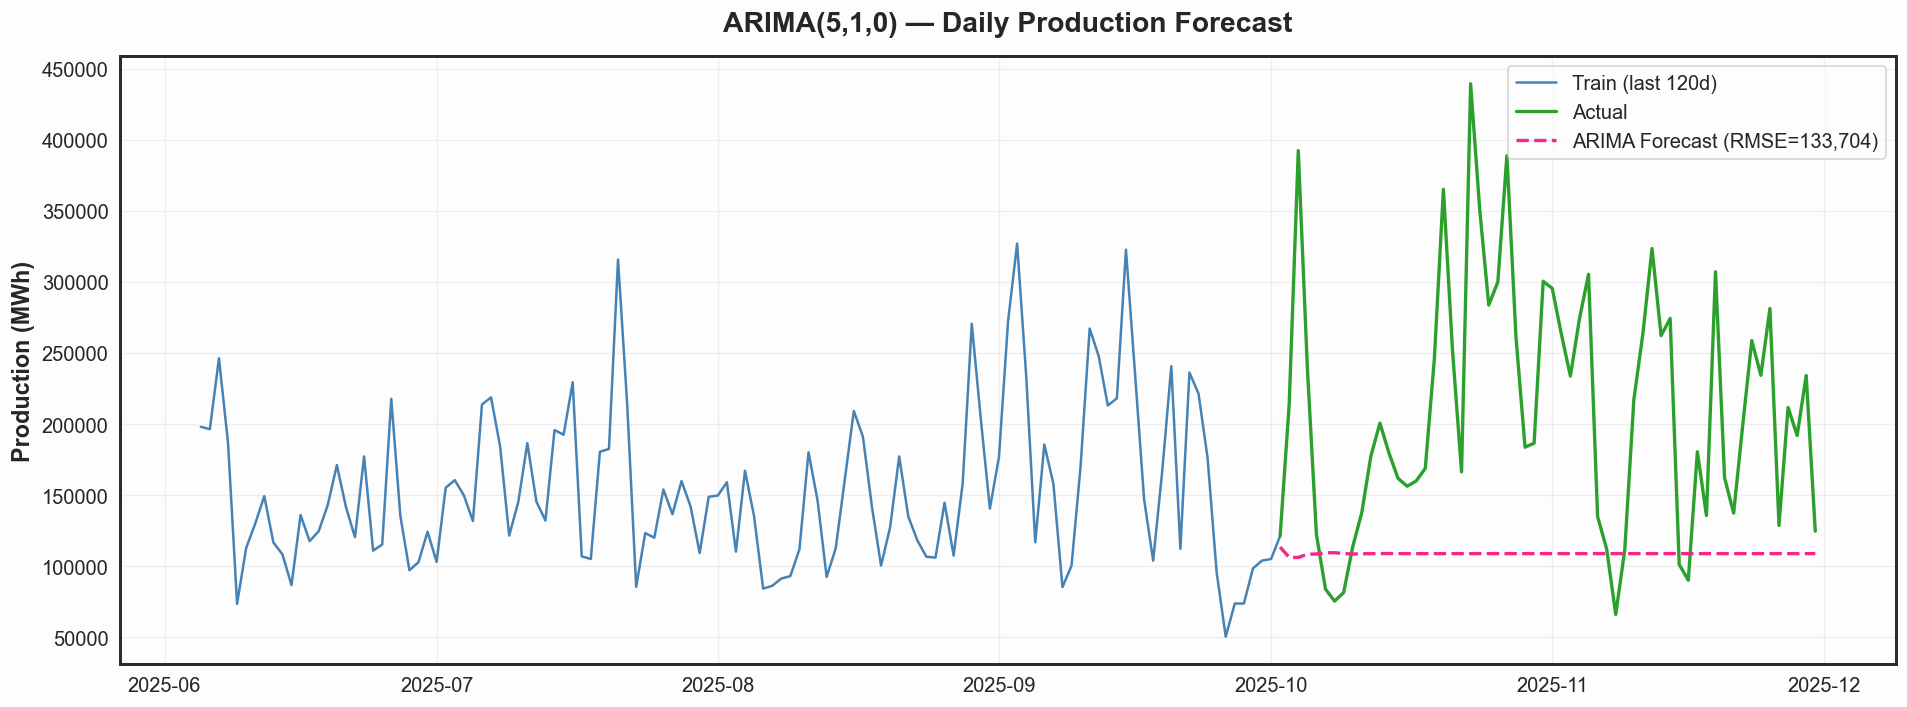

ARIMA  → RMSE: 133,704  |  MAE: 106,864


In [65]:
# ── MODEL 1: ARIMA(5,1,0) ──
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
arima_forecast.index = test.index

arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mae = mean_absolute_error(test, arima_forecast)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(train[-120:], label="Train (last 120d)", color="steelblue", linewidth=1.5)
ax.plot(test, label="Actual", color="#2ca02c", linewidth=2)
ax.plot(arima_forecast, label=f"ARIMA Forecast (RMSE={arima_rmse:,.0f})", color="#F72585", linewidth=2, linestyle="--")
ax.set_title("ARIMA(5,1,0) — Daily Production Forecast", pad=15)
ax.set_ylabel("Production (MWh)"); ax.legend(fontsize=12); ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()
print(f"ARIMA  → RMSE: {arima_rmse:,.0f}  |  MAE: {arima_mae:,.0f}")

17:37:30 - cmdstanpy - INFO - Chain [1] start processing
17:37:32 - cmdstanpy - INFO - Chain [1] done processing


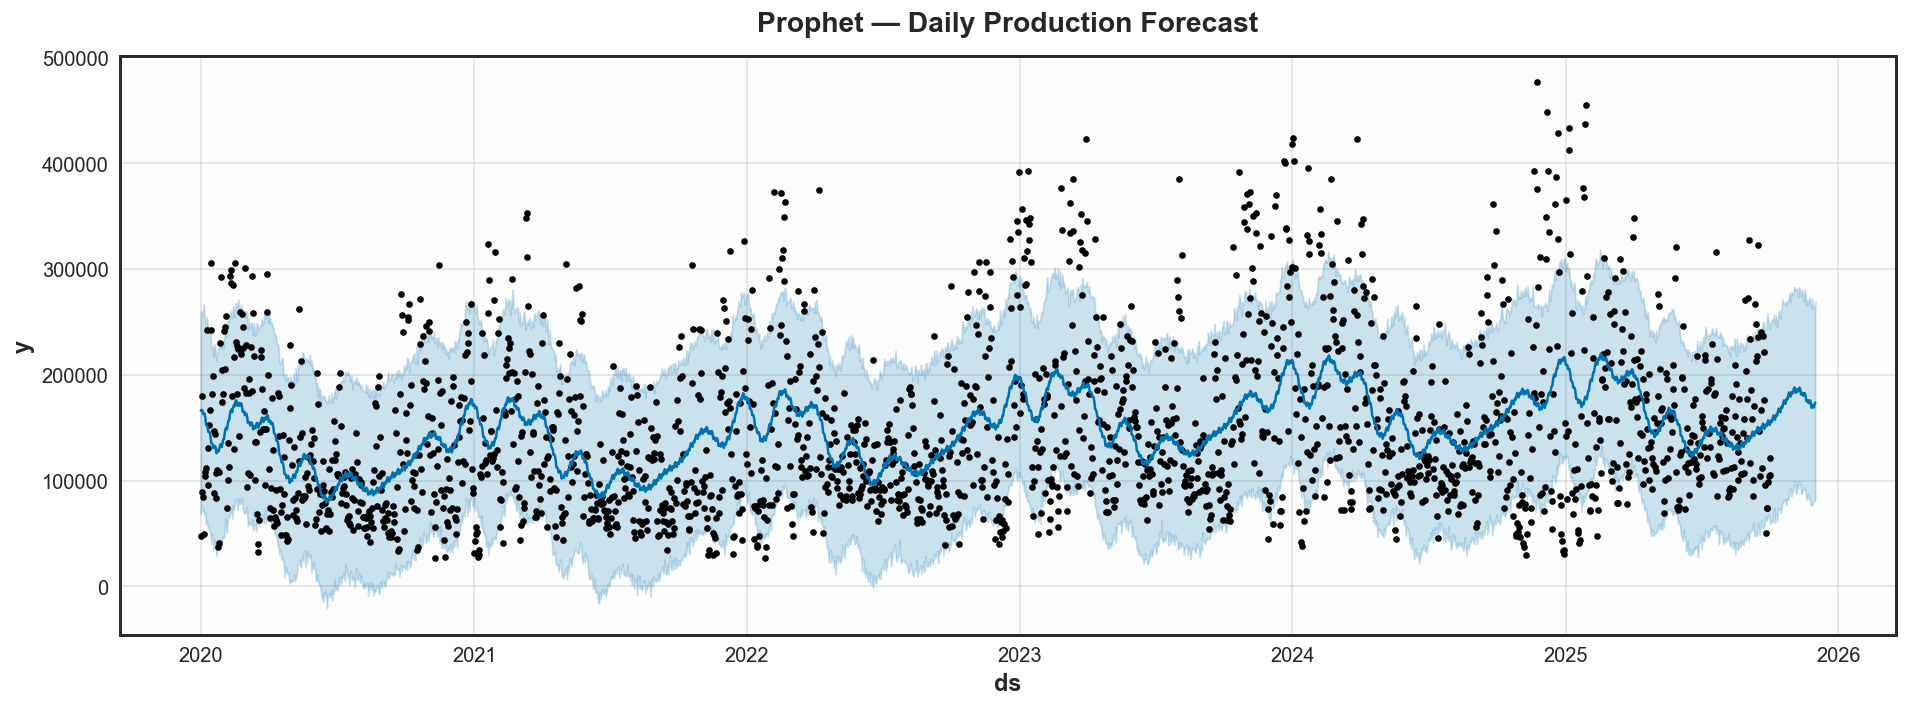

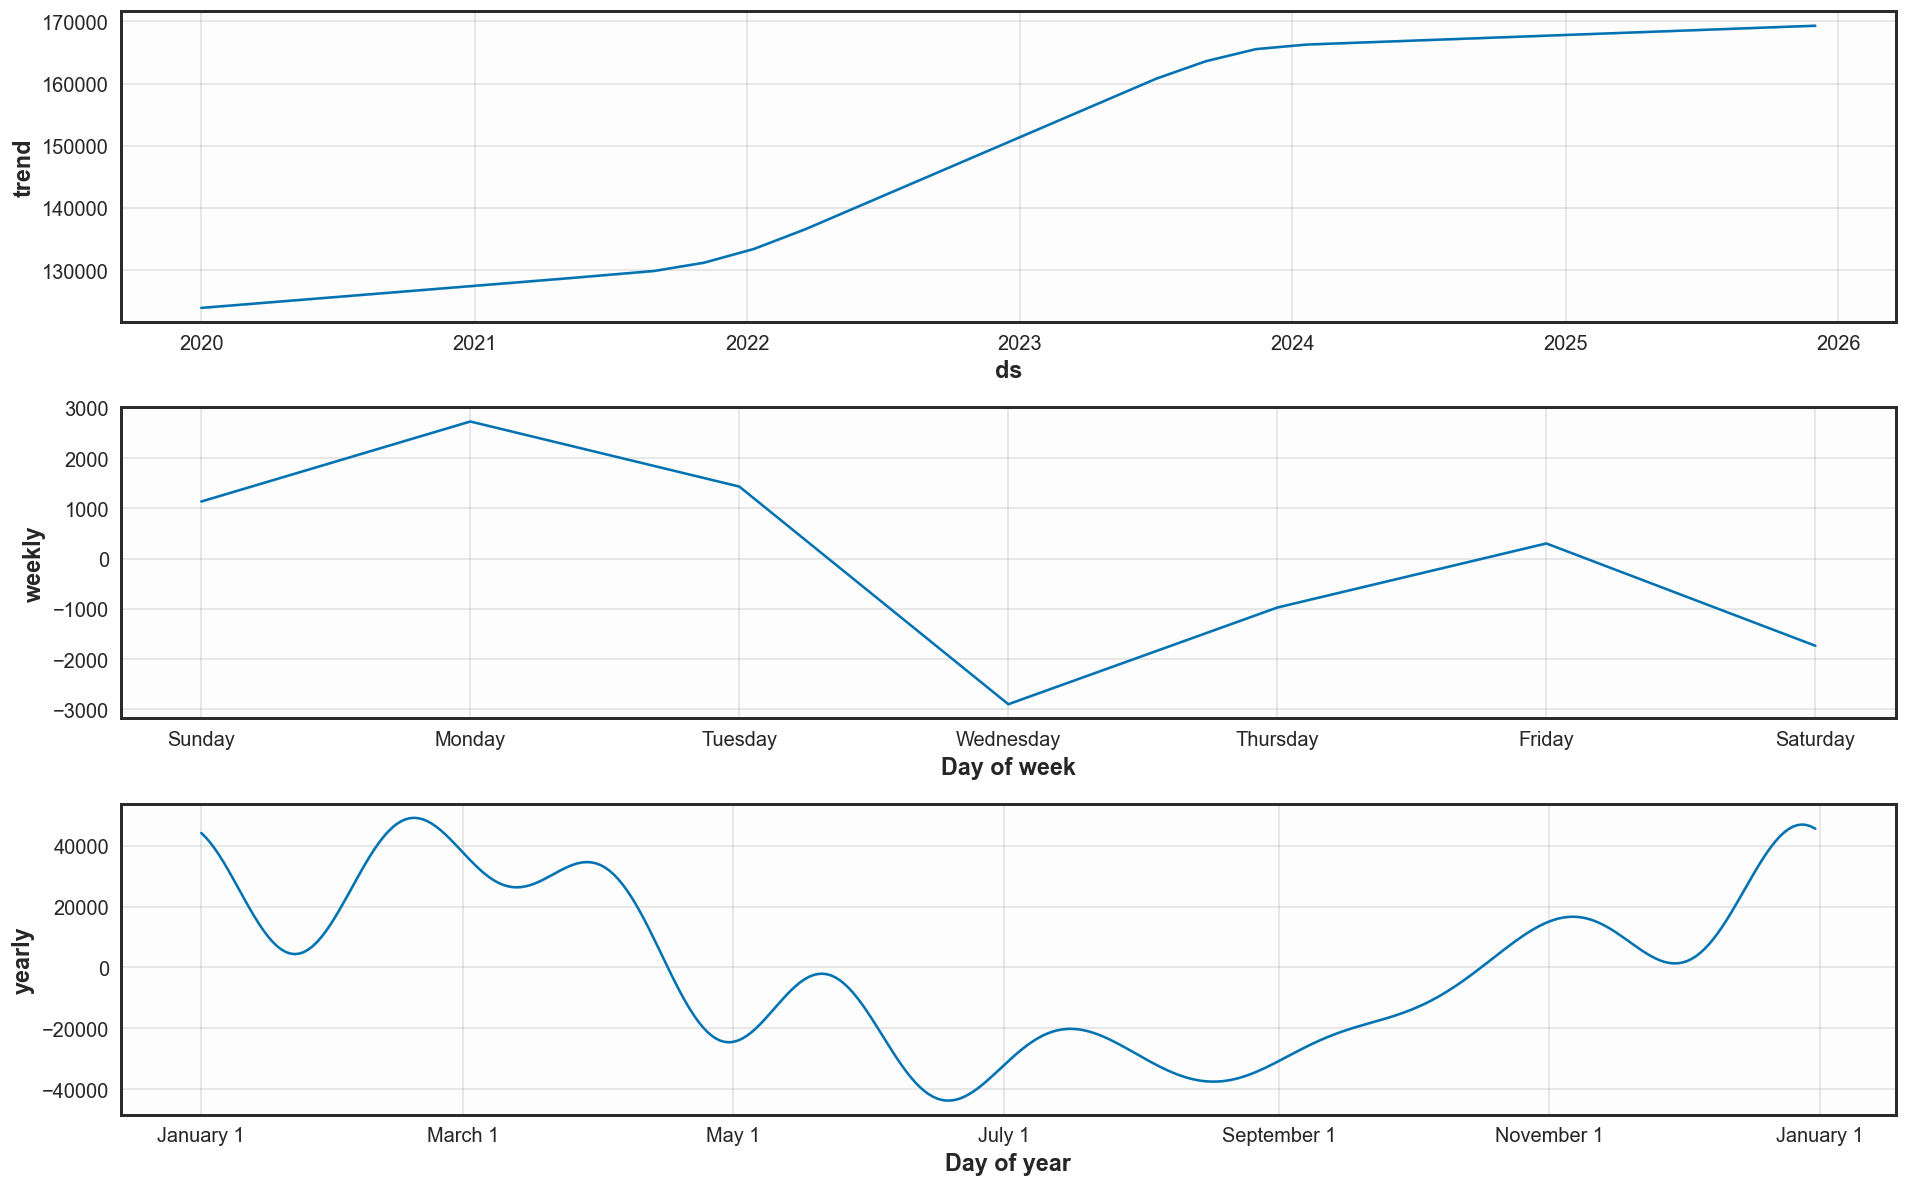

Prophet → RMSE: 92,056  |  MAE: 72,236


In [66]:
# ── MODEL 2: Prophet ──
try:
    from prophet import Prophet

    prophet_df = train.reset_index()
    prophet_df.columns = ["ds", "y"]

    prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    prophet_model.fit(prophet_df)

    future = prophet_model.make_future_dataframe(periods=len(test), freq="D")
    prophet_forecast = prophet_model.predict(future)

    prophet_pred = prophet_forecast.set_index("ds").loc[test.index, "yhat"]
    prophet_rmse = np.sqrt(mean_squared_error(test, prophet_pred))
    prophet_mae = mean_absolute_error(test, prophet_pred)

    fig = prophet_model.plot(prophet_forecast, figsize=(16, 6))
    plt.title("Prophet — Daily Production Forecast", fontsize=17, fontweight="bold", pad=15)
    plt.tight_layout(); plt.show()

    fig2 = prophet_model.plot_components(prophet_forecast, figsize=(16, 10))
    plt.tight_layout(); plt.show()

    print(f"Prophet → RMSE: {prophet_rmse:,.0f}  |  MAE: {prophet_mae:,.0f}")
except ImportError:
    print("⚠️ Prophet not installed. Install with: pip install prophet")
    prophet_rmse, prophet_mae = None, None

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/15


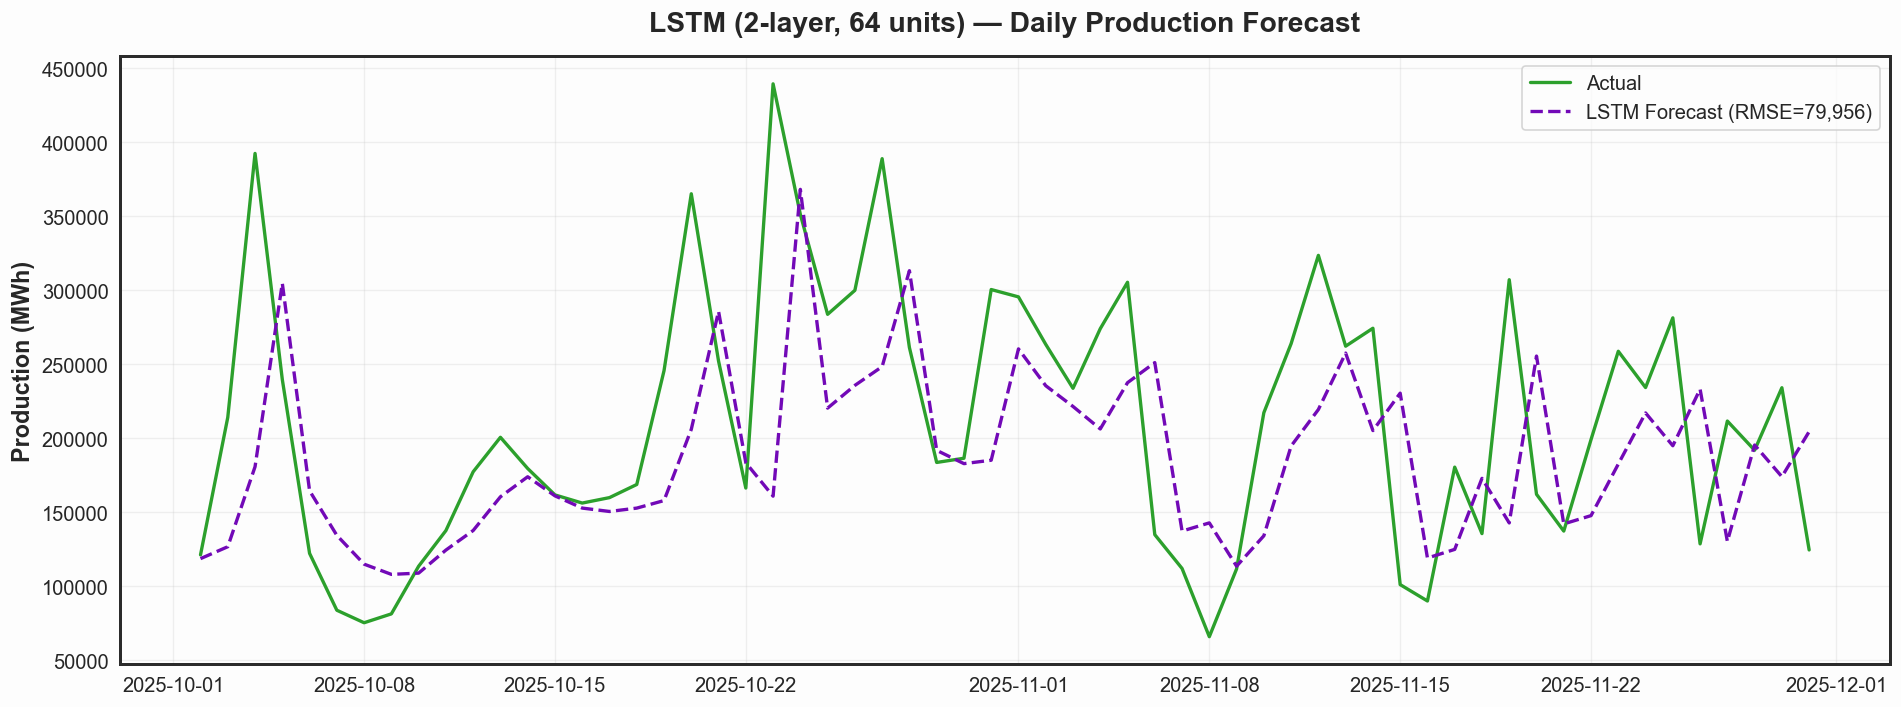

LSTM   → RMSE: 79,956  |  MAE: 58,899


In [67]:
# ── MODEL 3: LSTM ──
from sklearn.preprocessing import MinMaxScaler

values = df_ts["Production"].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

lookback = 60
X_all, y_all = [], []
for i in range(lookback, len(scaled)):
    X_all.append(scaled[i - lookback:i, 0])
    y_all.append(scaled[i, 0])
X_all, y_all = np.array(X_all), np.array(y_all)
X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], 1))

split_idx = len(X_all) - len(test)
X_train, X_test = X_all[:split_idx], X_all[split_idx:]
y_train, y_test = y_all[:split_idx], y_all[split_idx:]

try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout

    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(lookback, 1)),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    print(model.summary())

    history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

    lstm_pred_scaled = model.predict(X_test)
    lstm_pred = scaler.inverse_transform(lstm_pred_scaled).flatten()
    actual_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    lstm_rmse = np.sqrt(mean_squared_error(actual_test, lstm_pred))
    lstm_mae = mean_absolute_error(actual_test, lstm_pred)

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(test.index[:len(actual_test)], actual_test, label="Actual", color="#2ca02c", linewidth=2)
    ax.plot(test.index[:len(lstm_pred)], lstm_pred, label=f"LSTM Forecast (RMSE={lstm_rmse:,.0f})",
            color="#7209B7", linewidth=2, linestyle="--")
    ax.set_title("LSTM (2-layer, 64 units) — Daily Production Forecast", pad=15)
    ax.set_ylabel("Production (MWh)"); ax.legend(fontsize=12); ax.grid(True, alpha=0.3)
    plt.tight_layout(); plt.show()
    print(f"LSTM   → RMSE: {lstm_rmse:,.0f}  |  MAE: {lstm_mae:,.0f}")
except ImportError:
    print("⚠️ TensorFlow not installed. Install with: pip install tensorflow")
    lstm_rmse, lstm_mae = None, None

In [68]:
# ── MODEL COMPARISON TABLE ──
print("\n" + "═" * 60)
print("  📊 MODEL COMPARISON — Forecasting Performance")
print("═" * 60)
print(f"  {'Model':<15} {'RMSE':>10} {'MAE':>10}")
print(f"  {'─'*15} {'─'*10} {'─'*10}")
print(f"  {'ARIMA(5,1,0)':<15} {arima_rmse:>10,.0f} {arima_mae:>10,.0f}")
if prophet_rmse:
    print(f"  {'Prophet':<15} {prophet_rmse:>10,.0f} {prophet_mae:>10,.0f}")
if lstm_rmse:
    print(f"  {'LSTM':<15} {lstm_rmse:>10,.0f} {lstm_mae:>10,.0f}")
print("═" * 60)


════════════════════════════════════════════════════════════
  📊 MODEL COMPARISON — Forecasting Performance
════════════════════════════════════════════════════════════
  Model                 RMSE        MAE
  ─────────────── ────────── ──────────
  ARIMA(5,1,0)       133,704    106,864
  Prophet             92,056     72,236
  LSTM                79,956     58,899
════════════════════════════════════════════════════════════


### 📌 Key Observation — Forecasting

- **ARIMA** provides a simple baseline but struggles with the complex seasonality of renewable energy data.
- **Prophet** captures yearly and weekly seasonality well, making it a strong choice for production deployments where interpretability matters.
- **LSTM** can learn non-linear temporal dependencies but requires more data and tuning; its performance depends heavily on the lookback window and network architecture.
- **For production use**, an ensemble of Prophet (for seasonality) and LSTM (for residual patterns) would likely yield the best results.

---

> 🔜 **Next Step:** Build an interactive dashboard for real-time forecasting and production monitoring.